In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from matplotlib.ticker import StrMethodFormatter
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../data/Traffic_Accidents_2.csv')

In [3]:
df.head()

,Accident Number,Date and Time,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Property Damage,Hit and Run,Collision Type Description,Weather Description,Illumination Description,...,HarmfulDescriptions,ObjectId,Zip Code,RPA,Weather,IlluACCIDEmination,Collision Type,Reporting Officer,x,y
0,2008473471,7/14/2018 11:00:00 PM,2.0,2.0,0.0,NaN,N,ANGLE,NO ADVERSE CONDITIONS,NaN,...,NaN,1,37208.0,4525.0,1.0,1.0,4.0,225845.0,-9.664843e+06,4.323742e+06
1,20180039368,1/12/2018 11:34:00 PM,1.0,0.0,0.0,NaN,Y,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,SNOW,DAYLIGHT,...,CONCRETE TRAFFIC BARRIER;Ran Off Road-Left,2,37207.0,18062.0,4.0,1.0,0.0,151132.0,-9.658798e+06,4.332935e+06
2,2008787228,11/16/2018 9:33:00 AM,1.0,1.0,0.0,NaN,N,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,NO ADVERSE CONDITIONS,NaN,...,NaN,3,37203.0,5401.0,1.0,3.0,0.0,475881.0,-9.662645e+06,4.322558e+06
3,20180039370,1/12/2018 11:36:00 PM,1.0,1.0,0.0,NaN,Y,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,SNOW,DARK - LIGHTED,...,PEDESTRIAN,4,37216.0,1431.0,4.0,3.0,0.0,240972.0,-9.655323e+06,4.328165e+06
4,2009131786,2/19/2019 10:42:00 PM,1.0,1.0,0.0,NaN,N,HEAD-ON,NO ADVERSE CONDITIONS,NaN,...,NaN,5,37218.0,3235.0,1.0,1.0,2.0,562528.0,-9.674832e+06,4.329570e+06


In [4]:
print('Row count: ', df.shape[0])
print('Column count: ', df.shape[1])

Row count:  216713
Column count:  27


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216713 entries, 0 to 216712
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident Number             216713 non-null  int64  
 1   Date and Time               216713 non-null  object 
 2   Number of Motor Vehicles    216709 non-null  float64
 3   Number of Injuries          216710 non-null  float64
 4   Number of Fatalities        216710 non-null  float64
 5   Property Damage             17697 non-null   object 
 6   Hit and Run                 216699 non-null  object 
 7   Collision Type Description  203705 non-null  object 
 8   Weather Description         195215 non-null  object 
 9   Illumination Description    203218 non-null  object 
 10  Street Address              216474 non-null  object 
 11  City                        216709 non-null  object 
 12  State                       216709 non-null  object 
 13  Precinct      

In [6]:
#Looking at data types and sampling first 3 rows
pd.DataFrame({"Column": df.columns,
             "DataType": df.dtypes.values,
             "R1": df.iloc[0].values,
             "R2": df.iloc[1].values,
             "R3": df.iloc[2].values})

,Column,DataType,R1,R2,R3
0,Accident Number,int64,2008473471,20180039368,2008787228
1,Date and Time,object,7/14/2018 11:00:00 PM,1/12/2018 11:34:00 PM,11/16/2018 9:33:00 AM
2,Number of Motor Vehicles,float64,2.0,1.0,1.0
3,Number of Injuries,float64,2.0,0.0,1.0
4,Number of Fatalities,float64,0.0,0.0,0.0
5,Property Damage,object,NaN,NaN,NaN
6,Hit and Run,object,N,Y,N
7,Collision Type Description,object,ANGLE,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT
8,Weather Description,object,NO ADVERSE CONDITIONS,SNOW,NO ADVERSE CONDITIONS
9,Illumination Description,object,NaN,DAYLIGHT,NaN


In [7]:
df.describe()

,Accident Number,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Lat,Long,ObjectId,Zip Code,RPA,Weather,IlluACCIDEmination,Collision Type,Reporting Officer,x,y
count,2.167130e+05,216709.000000,216710.000000,216710.000000,216711.000000,216711.000000,216713.000000,216570.000000,216608.00000,195215.000000,203222.000000,203705.000000,2.166980e+05,2.167110e+05,2.167110e+05
mean,2.020886e+10,1.714834,0.410835,0.003835,36.145032,-86.743316,108357.000000,37172.364007,12604.11187,19.717138,1.927833,6.907101,1.222902e+06,-9.656222e+06,4.320612e+06
std,8.104245e+07,0.823652,0.775386,0.066273,0.169553,0.380924,62559.798781,69.474076,20749.17356,11.016559,3.869859,10.606326,1.563947e+06,4.240426e+04,2.079997e+04
min,2.008473e+09,0.000000,0.000000,0.000000,0.000000,-89.642550,1.000000,37013.000000,1001.00000,1.000000,1.000000,0.000000,1.000000e+00,-9.978963e+06,0.000000e+00
25%,2.019046e+10,1.000000,0.000000,0.000000,36.090980,-86.787790,54179.000000,37189.000000,4081.00000,21.000000,1.000000,4.000000,2.564140e+05,-9.661173e+06,4.313147e+06
50%,2.021017e+10,2.000000,0.000000,0.000000,36.149460,-86.750130,108357.000000,37207.000000,8125.00000,21.000000,1.000000,5.000000,3.728140e+05,-9.656980e+06,4.321206e+06
75%,2.023018e+10,2.000000,1.000000,0.000000,36.183640,-86.694580,162535.000000,37211.000000,8902.00000,21.000000,3.000000,11.000000,8.875920e+05,-9.650797e+06,4.325919e+06
max,2.025023e+10,27.000000,12.000000,4.000000,36.655540,0.000000,216713.000000,37240.000000,95101.00000,99.000000,98.000000,98.000000,4.019423e+06,0.000000e+00,4.391202e+06


### Numeric Fields

In [8]:
#Columns that should potentially be integer types
convert_cols = ['Number of Motor Vehicles', 'Number of Injuries', 'Number of Fatalities', 
                'Zip Code', 'RPA', 'Weather', 'IlluACCIDEmination', 'Collision Type', 'Reporting Officer']

for col in convert_cols:
    print(col)
    print(df[col].unique())
    print('**************')

Number of Motor Vehicles
[ 2.  1. nan  4.  3.  5.  8.  7.  6.  0. 12. 10. 11.  9. 27.]
**************
Number of Injuries
[ 2.  0.  1. nan  3.  5.  6.  4.  7. 10.  8. 12.  9. 11.]
**************
Number of Fatalities
[ 0. nan  1.  2.  3.  4.]
**************
Zip Code
[37208. 37207. 37203. 37216. 37218. 37209.    nan 37115. 37206. 37210.
 37213. 37217. 37013. 37211. 37138. 37212. 37221. 37205. 37076. 37214.
 37220. 37215. 37204. 37027. 37072. 37189. 37201. 37219. 37080. 37228.
 37240. 37015. 37122. 37135.]
**************
RPA
[ 4525. 18062.  5401. ...  4614.  4302. 19941.]
**************
Weather
[ 1.  4. 21. nan 28. 22.  3. 98. 99.  2.  5. 10.  8. 30.]
**************
IlluACCIDEmination
[ 1.  3.  2. nan  5.  4.  9.  7. 98.]
**************
Collision Type
[ 4.  0.  2.  1. 11. nan  5.  9. 16. 98.  3.  6.]
**************
Reporting Officer
[ 225845.  151132.  475881. ... 4017401. 4016941. 4016948.]
**************


In [9]:
#Change column types to Int64
convert_cols = ['Number of Motor Vehicles', 'Number of Injuries', 'Number of Fatalities', 
                'Zip Code', 'RPA', 'Weather', 'IlluACCIDEmination', 'Collision Type', 'Reporting Officer']

for col in convert_cols:
    df[col] = df[col].astype('Int64')


#Verify columns are converted to Int64
for col in convert_cols:
    print(col)
    print(df[col].unique())
    print('**************')

Number of Motor Vehicles
<IntegerArray>
[2, 1, <NA>, 4, 3, 5, 8, 7, 6, 0, 12, 10, 11, 9, 27]
Length: 15, dtype: Int64
**************
Number of Injuries
<IntegerArray>
[2, 0, 1, <NA>, 3, 5, 6, 4, 7, 10, 8, 12, 9, 11]
Length: 14, dtype: Int64
**************
Number of Fatalities
<IntegerArray>
[0, <NA>, 1, 2, 3, 4]
Length: 6, dtype: Int64
**************
Zip Code
<IntegerArray>
[37208, 37207, 37203, 37216, 37218, 37209,  <NA>, 37115, 37206, 37210, 37213,
 37217, 37013, 37211, 37138, 37212, 37221, 37205, 37076, 37214, 37220, 37215,
 37204, 37027, 37072, 37189, 37201, 37219, 37080, 37228, 37240, 37015, 37122,
 37135]
Length: 34, dtype: Int64
**************
RPA
<IntegerArray>
[ 4525, 18062,  5401,  1431,  3235,  4708,  4311,  1507,  1863,  1131,
 ...
 44061, 42024,  1255,  8163, 19061,  3309,  5125,  4614,  4302, 19941]
Length: 1971, dtype: Int64
**************
Weather
<IntegerArray>
[1, 4, 21, <NA>, 28, 22, 3, 98, 99, 2, 5, 10, 8, 30]
Length: 14, dtype: Int64
**************
IlluACCIDEminatio

In [10]:
#Removing "number of" and space in column names
cols_to_rename = ['Number of Motor Vehicles', 'Number of Injuries', 'Number of Fatalities', 
                'Zip Code', 'RPA', 'Weather', 'IlluACCIDEmination', 'Collision Type', 'Reporting Officer']
cols_renamed = [i.replace("Number of ", "").replace(" ", "") for i in cols_to_rename]
print(cols_renamed, '\n')

#make zip/dictionary for renaming
name_dict = dict(zip(cols_to_rename, cols_renamed))
print(name_dict, '\n')

#rename columns
df = df.rename(columns = name_dict)
df[cols_renamed].head()

['MotorVehicles', 'Injuries', 'Fatalities', 'ZipCode', 'RPA', 'Weather', 'IlluACCIDEmination', 'CollisionType', 'ReportingOfficer'] 

{'Number of Motor Vehicles': 'MotorVehicles', 'Number of Injuries': 'Injuries', 'Number of Fatalities': 'Fatalities', 'Zip Code': 'ZipCode', 'RPA': 'RPA', 'Weather': 'Weather', 'IlluACCIDEmination': 'IlluACCIDEmination', 'Collision Type': 'CollisionType', 'Reporting Officer': 'ReportingOfficer'} 



,MotorVehicles,Injuries,Fatalities,ZipCode,RPA,Weather,IlluACCIDEmination,CollisionType,ReportingOfficer
0,2,2,0,37208,4525,1,1,4,225845
1,1,0,0,37207,18062,4,1,0,151132
2,1,1,0,37203,5401,1,3,0,475881
3,1,1,0,37216,1431,4,3,0,240972
4,1,1,0,37218,3235,1,1,2,562528


### Object Fields

In [11]:
#Looking at object data types
df.describe(include = 'object')

,Date and Time,Property Damage,Hit and Run,Collision Type Description,Weather Description,Illumination Description,Street Address,City,State,Precinct,HarmfulCodes,HarmfulDescriptions
count,216713,17697,216699,203705,195215,203218,216474,216709,216709,216603,197287,195091
unique,191329,2,2,11,13,8,30403,20,1,8,3485,2711
top,3/28/2025 5:00:00 AM,Y,N,Front to Rear,CLEAR,DAYLIGHT,I40 E EXT RAMP & I 40,NASHVILLE,TN,SOUTH,12,MOTOR VEHICLE IN TRANSPORT
freq,18,17696,160021,66451,139255,131529,876,160531,216709,50597,139181,140450


In [12]:
#change Date and Time to datetime type
df['Date and Time'] = pd.to_datetime(df['Date and Time'])
df['Date and Time']

0        2018-07-14 23:00:00
1        2018-01-12 23:34:00
2        2018-11-16 09:33:00
3        2018-01-12 23:36:00
4        2019-02-19 22:42:00
                 ...        
216708   2025-04-09 19:33:00
216709   2025-04-09 19:37:00
216710   2025-04-09 19:48:00
216711   2025-04-09 05:00:00
216712   2025-04-09 20:18:00
Name: Date and Time, Length: 216713, dtype: datetime64[ns]

In [13]:
#Rename column for ease
df = df.rename(columns = {'Date and Time': 'DateTime'})

In [14]:
df['Property Damage'].value_counts(dropna=False)

NaN    199016
Y       17696
N           1
Name: Property Damage, dtype: int64

In [40]:
#Replace blank values for property damage with 'N' (per metadata description )
df['Property Damage'] = df['Property Damage'].fillna('N') 

#Recheck counts
df['Property Damage'].value_counts(dropna=False)

N    199004
Y     17696
Name: Property Damage, dtype: int64

In [41]:
df['Hit and Run'].value_counts(dropna=False)

N      160012
Y       56677
NaN        11
Name: Hit and Run, dtype: int64

In [42]:
#Looking at 14 NaN rows for Hit and Run
df[df['Hit and Run'].isna()]

,Accident Number,DateTime,MotorVehicles,Injuries,Fatalities,Property Damage,Hit and Run,Collision Type Description,Weather Description,Illumination Description,...,HarmfulDescriptions,ObjectId,ZipCode,RPA,Weather,IlluACCIDEmination,CollisionType,ReportingOfficer,x,y
69496,20190815727,2019-11-10 03:00:00,2,0,0,N,NaN,ANGLE,CLEAR,DARK - LIGHTED,...,MOTOR VEHICLE IN TRANSPORT,69497,37203,4083,21,3,4,298863,-9.660612e+06,4.322464e+06
83166,20200257637,2020-04-11 18:45:00,2,5,0,N,NaN,ANGLE,CLEAR,DAYLIGHT,...,MOTOR VEHICLE IN TRANSPORT,83167,37211,8421,21,1,4,212318,-9.654511e+06,4.312246e+06
87311,20200378405,2020-05-30 01:40:00,2,0,0,N,NaN,Front to Rear,CLEAR,DARK - LIGHTED,...,MOTOR VEHICLE IN TRANSPORT,87312,37217,8947,21,3,11,320603,-9.646199e+06,4.313652e+06
92365,20200600427,2020-09-18 22:15:00,2,0,0,N,NaN,Front to Rear,CLEAR,DAYLIGHT,...,MOTOR VEHICLE IN TRANSPORT,92366,37206,1009,21,1,11,352209,-9.658322e+06,4.323698e+06
92371,20200600518,2020-09-18 22:15:00,2,0,0,N,NaN,Front to Rear,CLEAR,DAYLIGHT,...,MOTOR VEHICLE IN TRANSPORT,92372,37206,1009,21,1,11,352209,-9.658322e+06,4.323698e+06
124904,20210547431,2021-10-21 12:35:00,1,0,0,Y,NaN,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,CLEAR,DAYLIGHT,...,DITCH,124905,37135,8773,21,1,0,4004352,-9.646963e+06,4.299441e+06
132882,20220056897,2022-02-07 13:37:00,0,3,0,N,NaN,ANGLE,CLEAR,DAYLIGHT,...,MOTOR VEHICLE IN TRANSPORT,132883,37205,4903,21,1,4,4001482,-9.643284e+06,4.321974e+06
132968,20220059133,2022-02-08 20:26:00,0,0,0,N,NaN,Front to Rear,CLEAR,DAYLIGHT,...,MOTOR VEHICLE IN TRANSPORT,132969,37204,83062,21,1,11,4001081,-9.657970e+06,4.317369e+06
161186,20230117020,2023-02-24 13:30:00,2,0,0,N,NaN,ANGLE,CLOUDY,DAYLIGHT,...,MOTOR VEHICLE IN TRANSPORT,161187,37013,8977,22,1,4,4008199,-9.640240e+06,4.309831e+06
162489,20230171473,2023-03-22 13:04:00,1,1,0,N,NaN,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,RAIN,DAWN,...,Ran Off Road-Right;EMBANKMENT EARTH,162490,37076,9502,2,4,0,109502,-9.638028e+06,4.323936e+06


In [43]:
#counting how many other missing fields there are for 14 missing H/R rows
df[df['Hit and Run'].isna()].isna().sum(axis=1)

69496     1
83166     1
87311     1
92365     1
92371     1
124904    1
132882    1
132968    1
161186    1
162489    1
170944    1
dtype: int64

In [44]:
#make df for count na values per row
nact = pd.DataFrame(df[df['Hit and Run'].isna()].isna().sum(axis=1)).reset_index()
nact.columns = ['idx', 'na_ct']
nact

#high count = having >10 missing values
high_na = nact[nact['na_ct']>10]
high_na

,idx,na_ct


In [45]:
#3 rows have >10 missing fields: looking at what other fields are missing
df.loc[high_na['idx']].iloc[:, 2:15]

,MotorVehicles,Injuries,Fatalities,Property Damage,Hit and Run,Collision Type Description,Weather Description,Illumination Description,Street Address,City,State,Precinct,Lat


In [46]:
df.loc[high_na['idx']].iloc[:, 15:28]

,Long,HarmfulCodes,HarmfulDescriptions,ObjectId,ZipCode,RPA,Weather,IlluACCIDEmination,CollisionType,ReportingOfficer,x,y


In [47]:
#only location info is present for above values - dropping from df
#using index to drop
drop_index_list = high_na['idx']
df = df.drop(drop_index_list)

In [48]:
#checking all df for rows with high counts of missing values
row_na_ct = pd.DataFrame(df.isna().sum(axis=1)).reset_index()
row_na_ct.columns = ['index', 'missing_fields']
row_na_ct[row_na_ct.missing_fields > 10]

,index,missing_fields


In [49]:
len(row_na_ct[row_na_ct.missing_fields > 10])

0

In [50]:
#10 rows that have at least 10 missing values
#looking at 10 rows and what fields are missing
index_list = row_na_ct[row_na_ct.missing_fields > 10]['index']
df.loc[index_list].iloc[:, 0:14]

,Accident Number,DateTime,MotorVehicles,Injuries,Fatalities,Property Damage,Hit and Run,Collision Type Description,Weather Description,Illumination Description,Street Address,City,State,Precinct


In [51]:
df.loc[index_list].iloc[:, 14:27]

,Lat,Long,HarmfulCodes,HarmfulDescriptions,ObjectId,ZipCode,RPA,Weather,IlluACCIDEmination,CollisionType,ReportingOfficer,x,y


In [37]:
#dropping above rows since they also give minimal info
df = df.drop(index_list)

In [52]:
df.shape

(216700, 27)

In [53]:
#Summarizing Object fields
object_cols = df.select_dtypes(include = 'object').columns

for i in object_cols:
    print(i)
    print('Unique values:' , df[i].nunique())
    print('Null values:', df[i].isna().sum())
    print(df[i].value_counts(dropna = False))
    print('-----','\n')

Property Damage
Unique values: 2
Null values: 0
N    199004
Y     17696
Name: Property Damage, dtype: int64
----- 

Hit and Run
Unique values: 2
Null values: 11
N      160012
Y       56677
NaN        11
Name: Hit and Run, dtype: int64
----- 

Collision Type Description
Unique values: 11
Null values: 12995
Front to Rear                              66451
ANGLE                                      54381
NOT COLLISION W/MOTOR VEHICLE-TRANSPORT    36625
SIDESWIPE - SAME DIRECTION                 28974
NaN                                        12995
HEAD-ON                                     5278
SIDESWIPE - OPPOSITE DIRECTION              4486
UNKNOWN                                     3048
OTHER                                       2318
Rear to Side                                1166
REAR-TO-REAR                                 977
REAR END                                       1
Name: Collision Type Description, dtype: int64
----- 

Weather Description
Unique values: 13
Null values:

## Exploratory DA

#### Date and Time

In [54]:
#Counting column
df['ct']=1

In [55]:
df['DateTime'].describe(datetime_is_numeric=True)

count                           216700
mean     2021-05-15 05:20:29.227780608
min                2018-01-01 06:00:00
25%                2019-06-17 20:13:45
50%                2021-03-27 12:03:30
75%                2023-03-28 18:05:15
max                2025-04-13 23:49:00
Name: DateTime, dtype: object

Text(0.5, 0, 'Year')

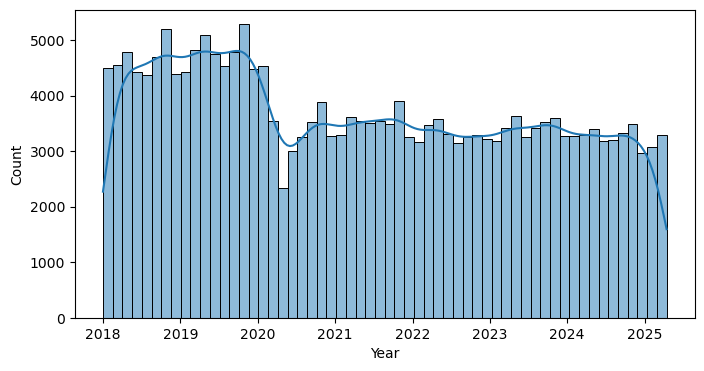

In [56]:
plt.figure(figsize = (8, 4))
sns.histplot(data = df, x = df['DateTime'], kde = True)
plt.xlabel('Year')

In [57]:
#Add a year field
df['Year'] = df['DateTime'].dt.year

#verify
df[['DateTime','Year']].head()

,DateTime,Year
0,2018-07-14 23:00:00,2018
1,2018-01-12 23:34:00,2018
2,2018-11-16 09:33:00,2018
3,2018-01-12 23:36:00,2018
4,2019-02-19 22:42:00,2019


In [58]:
#Count by Year
df['Year'].sort_values().value_counts(dropna = False, sort = False)

2018    36758
2019    37916
2020    27402
2021    28006
2022    26319
2023    27104
2024    26143
2025     7052
Name: Year, dtype: int64

In [59]:
#filter out 2025 for incomplete data
dfpre25 = df[df['Year'] < 2025].copy()
print('Row, column count:', dfpre25.shape)
dfpre25.head()

Row, column count: (209648, 29)


,Accident Number,DateTime,MotorVehicles,Injuries,Fatalities,Property Damage,Hit and Run,Collision Type Description,Weather Description,Illumination Description,...,ZipCode,RPA,Weather,IlluACCIDEmination,CollisionType,ReportingOfficer,x,y,ct,Year
0,2008473471,2018-07-14 23:00:00,2,2,0,N,N,ANGLE,NO ADVERSE CONDITIONS,NaN,...,37208,4525,1,1,4,225845,-9.664843e+06,4.323742e+06,1,2018
1,20180039368,2018-01-12 23:34:00,1,0,0,N,Y,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,SNOW,DAYLIGHT,...,37207,18062,4,1,0,151132,-9.658798e+06,4.332935e+06,1,2018
2,2008787228,2018-11-16 09:33:00,1,1,0,N,N,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,NO ADVERSE CONDITIONS,NaN,...,37203,5401,1,3,0,475881,-9.662645e+06,4.322558e+06,1,2018
3,20180039370,2018-01-12 23:36:00,1,1,0,N,Y,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,SNOW,DARK - LIGHTED,...,37216,1431,4,3,0,240972,-9.655323e+06,4.328165e+06,1,2018
4,2009131786,2019-02-19 22:42:00,1,1,0,N,N,HEAD-ON,NO ADVERSE CONDITIONS,NaN,...,37218,3235,1,1,2,562528,-9.674832e+06,4.329570e+06,1,2019


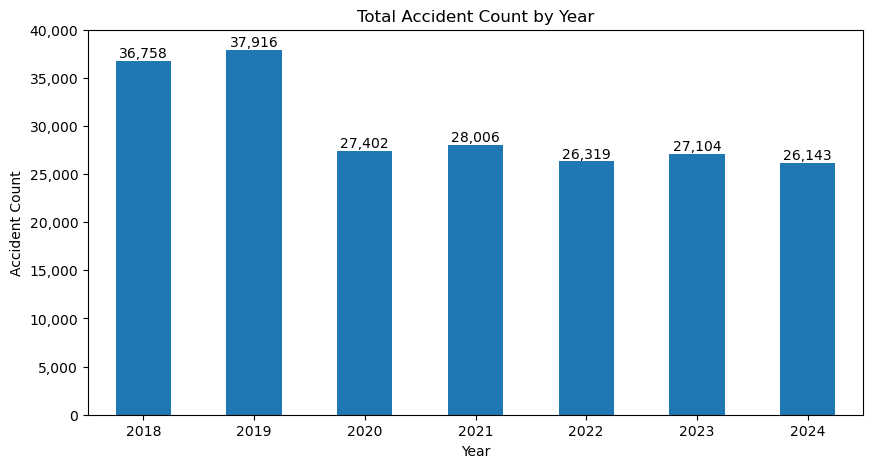

In [60]:
ax = dfpre25['Year'].sort_values().value_counts(dropna = False, sort = False).plot(kind = 'bar', figsize=(10, 5))
plt.xlabel('Year')
plt.xticks(rotation = 0, ha = 'center')

ytk =  np.arange(0, 40001, 5000)
ylb = [f'{i:,}' for i in np.arange(0, 40001, 5000)]
plt.yticks(ytk, ylb)

plt.ylabel('Accident Count')

plt.title('Total Accident Count by Year')

for rect in ax.patches:
    #size of each bar (height, width)
    height = rect.get_height()
    width = rect.get_width()
   
    #starting coordinates of each bar (bottom left corner)
    x = rect.get_x()
    y = rect.get_y()
    
    #label text - use bar height as label text    
    label_text = f'{height:,}'

    #x coo for label = starting coo + midpoint of width
    label_x = x + width / 2
    #y coo for label = starting coo + height (place at top)
    label_y = y + height+1500
    
    # plot only when height is greater than specified value
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='top', fontsize=10, color = 'black')

#plt.show()
#plt.savefig('../viz/Accident_Count_by_Year.png')

In [62]:
#Adding Year-to-Year %change
y2y = pd.DataFrame(dfpre25['Year'].sort_values().value_counts(sort = False)).reset_index()
y2y.columns = ['Year', 'Count']
y2y['Prev'] = y2y['Count'].shift(1).astype('Int64')
y2y['Change'] = y2y['Count'] - y2y['Prev']
y2y['Changepct'] = round(100*y2y['Change']/y2y['Prev']).astype('Int64')
y2y

,Year,Count,Prev,Change,Changepct
0,2018,36758,<NA>,<NA>,<NA>
1,2019,37916,36758,1158,3
2,2020,27402,37916,-10514,-28
3,2021,28006,27402,604,2
4,2022,26319,28006,-1687,-6
5,2023,27104,26319,785,3
6,2024,26143,27104,-961,-4


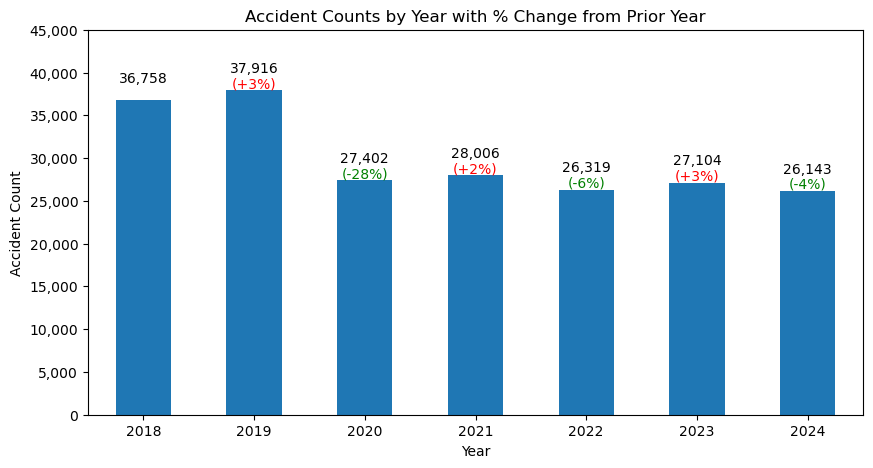

In [73]:
ax = y2y.plot(kind = 'bar', x = 'Year', y = 'Count', figsize=(10, 5), legend = False)
plt.xlabel('Year')
plt.xticks(rotation = 0, ha = 'center')

ytk =  np.arange(0, 45001, 5000)
ylb = [f'{i:,}' for i in np.arange(0, 45001, 5000)]
plt.yticks(ytk, ylb)

plt.ylabel('Accident Count')

plt.title('Accident Counts by Year with % Change from Prior Year')

#dictionary for referencing %change: key is height
chg = dict(zip(y2y['Count'], y2y['Changepct']))

for rect in ax.patches:
    #size of each bar (height, width)
    height = rect.get_height()
    width = rect.get_width()
    
    #refer %change for each height
    pct = chg[height]
   
    #starting coordinates of each bar (bottom left corner)
    x = rect.get_x()
    y = rect.get_y()
    
    #label text - use bar height as label text    
    label_text = f'{height:,}'
    
    #label text for %change - add + sign for positive numbers
    if pd.notna(pct) and pct > 0:
        label_text_pct = f'(+{pct}%)'
    else:
        label_text_pct = f'({pct}%)'
    

    #x coo for label = starting coo + midpoint of width
    label_x = x + width / 2
    #y coo for label = starting coo + height (place at top)
    label_y = y + height+3400
    label_y_p = y+height+1600
    
    #conditions for text labels: red for increase, green for decrease
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='top', fontsize=10, color = 'black')
    if pd.notna(pct) and pct > 0:
        ax.text(label_x, label_y_p, label_text_pct, ha='center', va='top', fontsize=10, color = 'red')
    elif pd.notna(pct) and pct < 0:
        ax.text(label_x, label_y_p, label_text_pct, ha='center', va='top', fontsize=10, color = 'green')

#plt.show()
#plt.savefig('../viz/Accident_Count_by_Year_Y2Y.png')

In [80]:
#Add a month field
df['MonthN'] = df['DateTime'].dt.month_name()
df['Month'] = df['DateTime'].dt.month

df[['DateTime', 'MonthN', 'Month']].head()

,DateTime,MonthN,Month
0,2018-07-14 23:00:00,July,7
1,2018-01-12 23:34:00,January,1
2,2018-11-16 09:33:00,November,11
3,2018-01-12 23:36:00,January,1
4,2019-02-19 22:42:00,February,2


In [81]:
dfpre25 = df[df['Year'] < 2025].copy()

In [74]:
#Filter out 2025 for month comparison
df2 = df.loc[df['DateTime'].dt.year < 2025]
df2['DateTime'].dt.year.max()

2024

<Axes: xlabel='DateTime'>

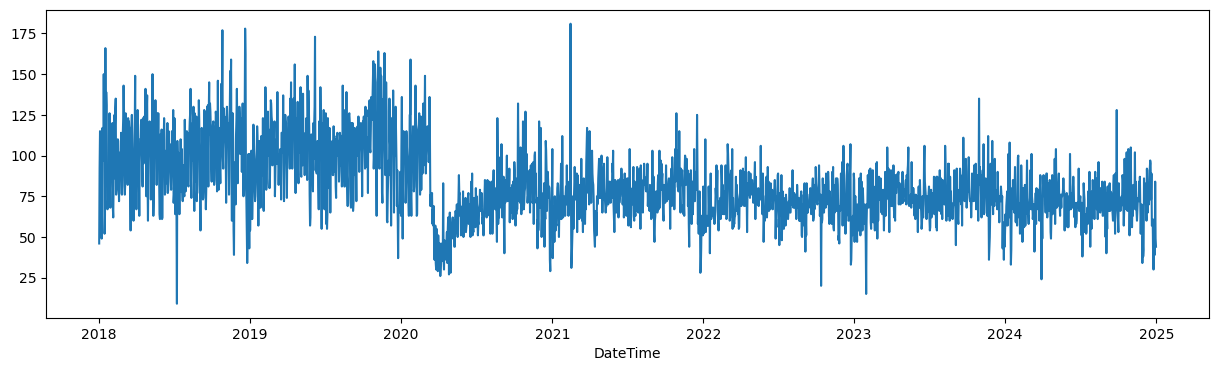

In [82]:
plt.figure(figsize = (15,4))
daily_ct =dfpre25.groupby(pd.Grouper(key = 'DateTime', freq = 'D')).size()
sns.lineplot(x = daily_ct.index, y=daily_ct.values)

In [84]:
dfpre25['MonthN'].value_counts()

October      19543
August       18034
May          17828
March        17783
November     17761
January      17208
September    17153
December     17035
April        17016
February     17005
June         16792
July         16490
Name: MonthN, dtype: int64

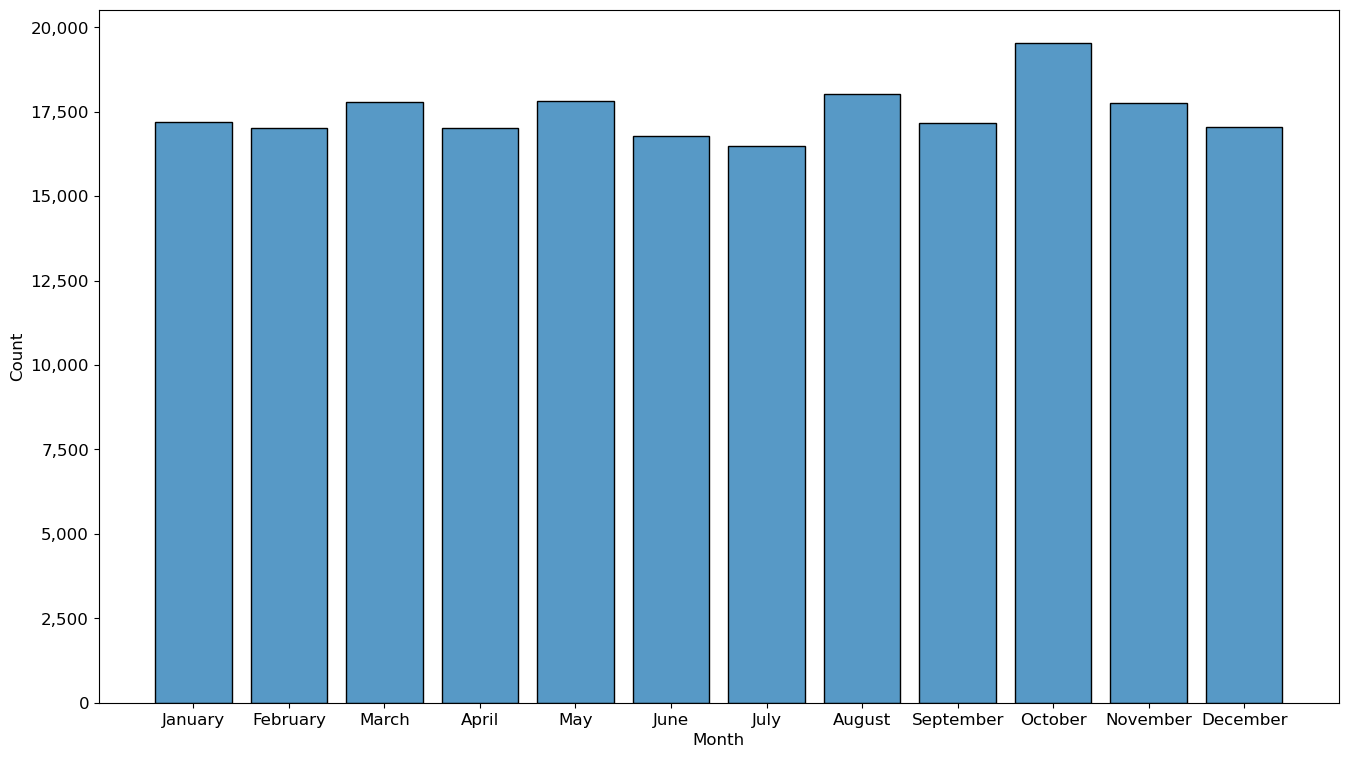

In [95]:
plt.figure(figsize = (16,9))
sns.histplot(data=df2['DateTime'].sort_values().dt.month_name(), shrink = 0.8)
plt.xlabel('Month', fontsize=12)

ytk =  np.arange(0, 20001, 2500)
ylb = [f'{i:,}' for i in np.arange(0, 20001, 2500)]
plt.yticks(ytk, ylb, fontsize =12)
plt.xticks(fontsize =12)
plt.ylabel('Count', fontsize = 12)
#plt.show()
#plt.savefig('../viz/Accident_Ct_By_Month.png')

In [96]:
#Count by each month of every year
monthly_ct = df2.groupby(pd.Grouper(key = 'DateTime', freq = 'M')).size()
monthly_ct

DateTime
2018-01-31    2984
2018-02-28    2720
2018-03-31    3195
2018-04-30    3029
2018-05-31    3208
              ... 
2024-08-31    2275
2024-09-30    2163
2024-10-31    2426
2024-11-30    2067
2024-12-31    2117
Freq: M, Length: 84, dtype: int64

In [97]:
#Make df to count accidents each month of every year
monthly_df = pd.DataFrame({"month": monthly_ct.index,
                              "count": monthly_ct.values})

monthly_df['year'] = monthly_df['month'].dt.year
monthly_df['month_name'] = monthly_df['month'].dt.month_name().str.slice(stop = 3)
monthly_df

,month,count,year,month_name
0,2018-01-31,2984,2018,Jan
1,2018-02-28,2720,2018,Feb
2,2018-03-31,3195,2018,Mar
3,2018-04-30,3029,2018,Apr
4,2018-05-31,3208,2018,May
...,...,...,...,...
79,2024-08-31,2275,2024,Aug
80,2024-09-30,2163,2024,Sep
81,2024-10-31,2426,2024,Oct
82,2024-11-30,2067,2024,Nov


<Axes: xlabel='month', ylabel='count'>

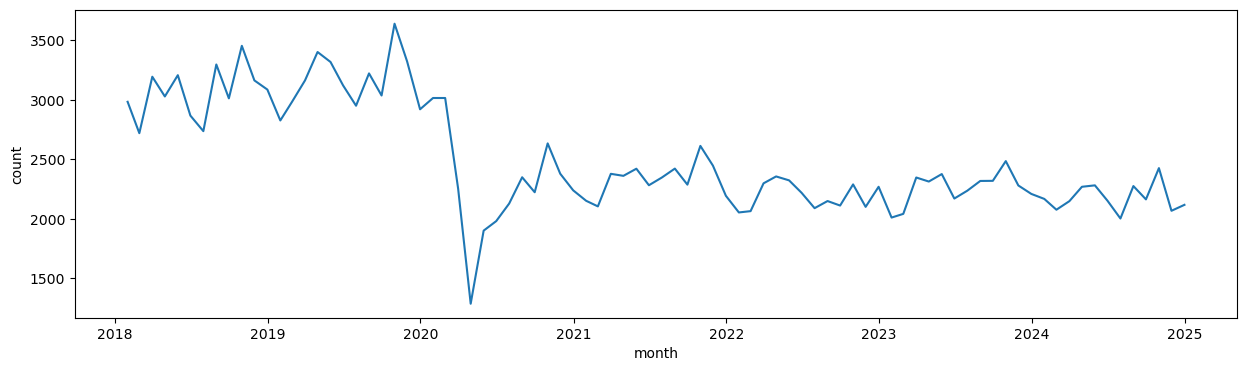

In [98]:
plt.figure(figsize = (15, 4))
sns.lineplot(data = monthly_df, x='month', y = 'count')

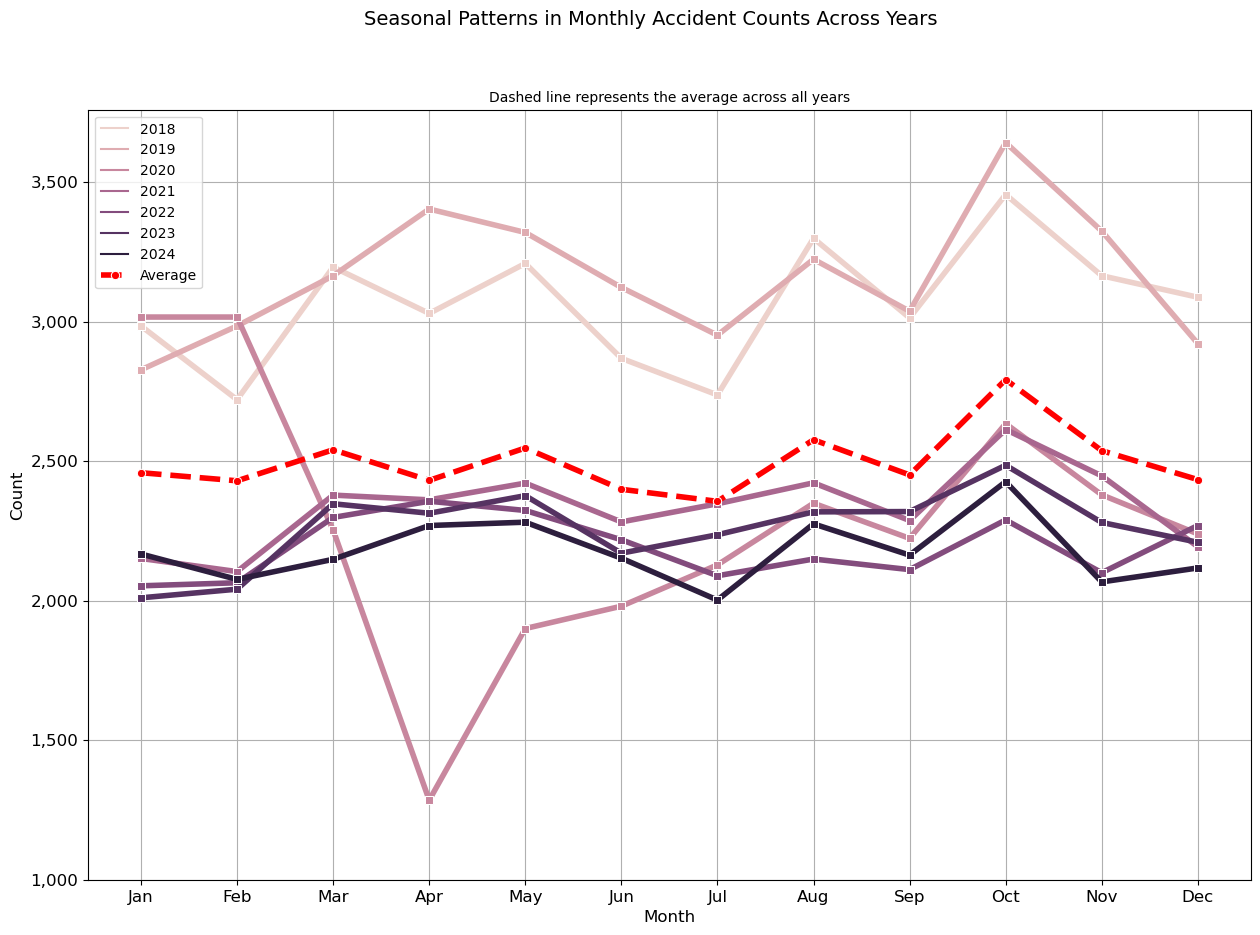

In [108]:
plt.figure(figsize = (15,10))
sns.lineplot(data = monthly_df, x='month_name', y = 'count', hue = 'year', marker = 's', linewidth = 4)
sns.lineplot(data = monthly_df, x='month_name', y = 'count',  linestyle = '--', color = 'red', errorbar=None, linewidth = 4, marker ='o', label = 'Average')
plt.suptitle('Seasonal Patterns in Monthly Accident Counts Across Years', fontsize = 14)
plt.title('Dashed line represents the average across all years', fontsize = 10)
plt.grid(True)

plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize = 12)

ytk =  np.arange(1000, 3501, 500)
ylb = [f'{i:,}' for i in np.arange(1000, 3501, 500)]
plt.yticks(ytk, ylb, fontsize =12)
plt.xticks(fontsize =12)

plt.legend()
#plt.show()

#plt.savefig('../viz/M2M_Across_Years.png')

In [109]:
#Hourly
hourly_ct = df2.groupby(pd.Grouper(key = 'DateTime', freq = 'H')).size()

hrly_df = pd.DataFrame({'DateTime': hourly_ct.index,
             'Count': hourly_ct.values})
hrly_df = hrly_df.sort_values(by = 'DateTime')
hrly_df

,DateTime,Count
0,2018-01-01 06:00:00,14
1,2018-01-01 07:00:00,7
2,2018-01-01 08:00:00,1
3,2018-01-01 09:00:00,1
4,2018-01-01 10:00:00,0
...,...,...
61357,2024-12-31 19:00:00,1
61358,2024-12-31 20:00:00,2
61359,2024-12-31 21:00:00,6
61360,2024-12-31 22:00:00,2


In [110]:
hrly_df['Hour'] = hrly_df['DateTime'].dt.strftime('%#I %p')
hrly_df['HR'] = hrly_df['DateTime'].dt.hour
hrly_df['DayName'] = hrly_df['DateTime'].dt.day_name()
hrly_df['DayofM'] = hrly_df['DateTime'].dt.day
hrly_df['Month'] = hrly_df['DateTime'].dt.month_name().str.slice(stop=3)
hrly_df['Year'] = hrly_df['DateTime'].dt.year

hrly_df

,DateTime,Count,Hour,HR,DayName,DayofM,Month,Year
0,2018-01-01 06:00:00,14,6 AM,6,Monday,1,Jan,2018
1,2018-01-01 07:00:00,7,7 AM,7,Monday,1,Jan,2018
2,2018-01-01 08:00:00,1,8 AM,8,Monday,1,Jan,2018
3,2018-01-01 09:00:00,1,9 AM,9,Monday,1,Jan,2018
4,2018-01-01 10:00:00,0,10 AM,10,Monday,1,Jan,2018
...,...,...,...,...,...,...,...,...
61357,2024-12-31 19:00:00,1,7 PM,19,Tuesday,31,Dec,2024
61358,2024-12-31 20:00:00,2,8 PM,20,Tuesday,31,Dec,2024
61359,2024-12-31 21:00:00,6,9 PM,21,Tuesday,31,Dec,2024
61360,2024-12-31 22:00:00,2,10 PM,22,Tuesday,31,Dec,2024


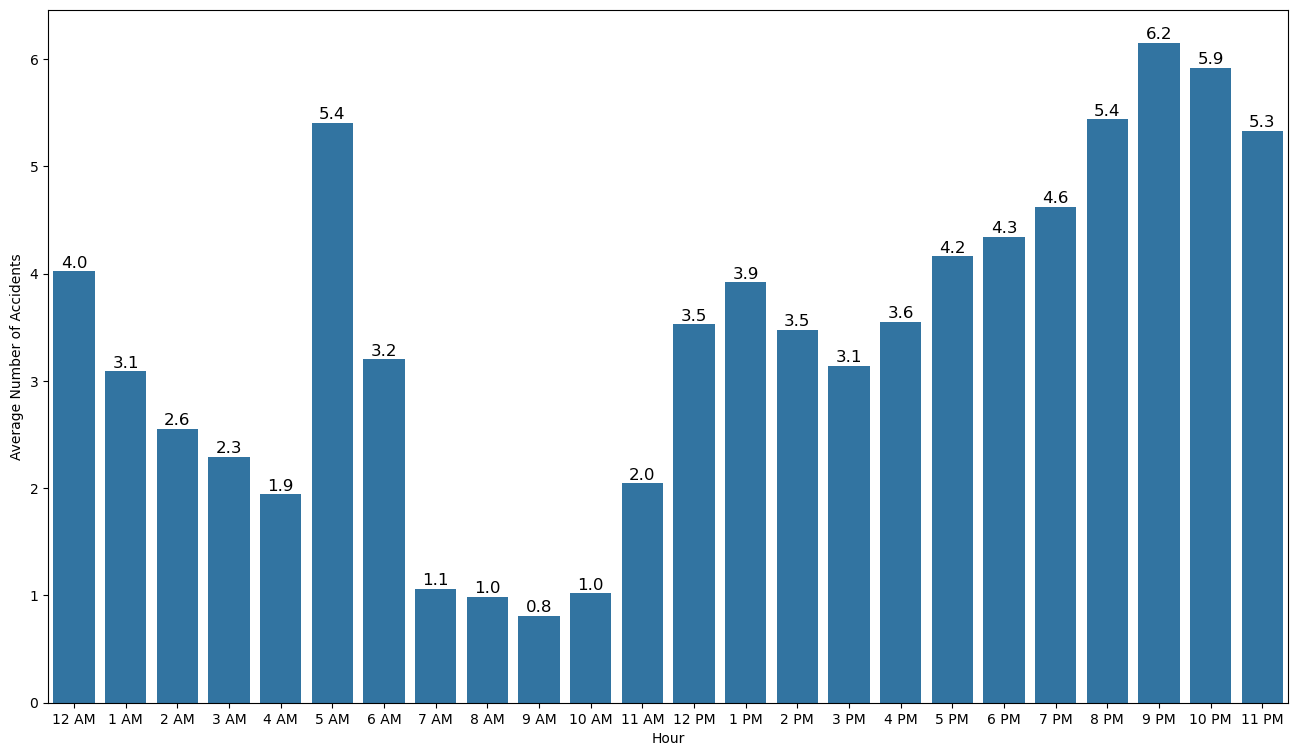

In [127]:
plt.figure(figsize = (16,9))
ax = sns.barplot(data = hrly_df.sort_values(by = 'HR'),  x = 'Hour', y = 'Count', color = '#1f77b4', errorbar = None)

for rect in ax.patches:
    #size of each bar (height, width)
    height = rect.get_height()
    width = rect.get_width()
    #starting coordinates of each bar (bottom left corner)
    x = rect.get_x()
    y = rect.get_y()
    
    #label text - use bar height as label text    
    label_text = f'{height:.1f}' 

    #x coo for label = starting coo + midpoint of width
    label_x = x + width / 2
    #y coo for label = starting coo + height (place at top)
    label_y = y + height+0.15
    
    #conditions for text labels: red for increase, green for decrease
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='top', fontsize=12, color = 'black')
plt.ylabel('Average Number of Accidents', fontsize = 10)
plt.savefig('../viz/Hrly_Ct.png')

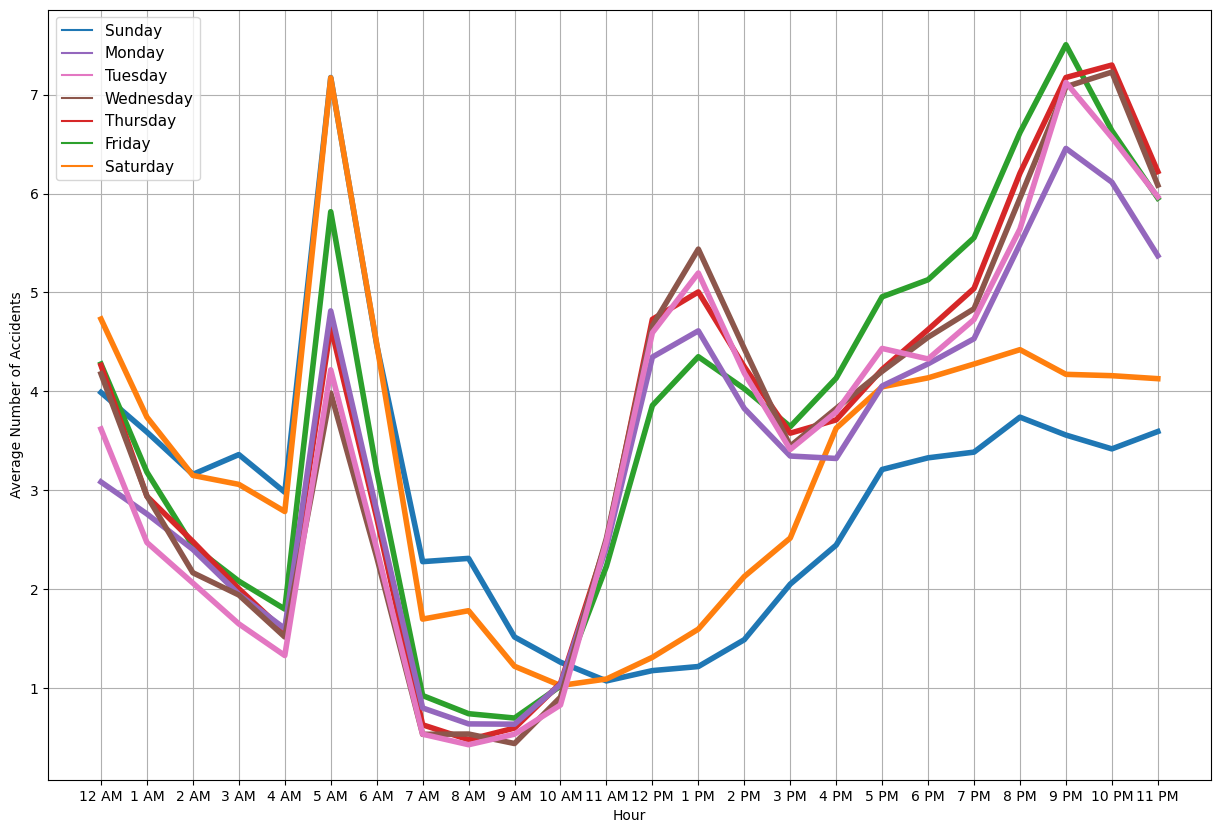

In [131]:
plt.figure(figsize = (15,10))
sns.lineplot(data = hrly_df.sort_values(by = 'HR'), x = 'Hour', y = 'Count', hue = 'DayName', errorbar = None, linewidth = 4)



#Arrange Label by Sun-Sat Order
#get handle and label from plot
hand, label = plt.gca().get_legend_handles_labels()

#zip handle and label into a dictionary -- label is key; handle is value
label_dict = dict(zip(label, hand))

#define order
dayorder = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

#make a new ordred list of handles using list comprehension
#goes in the order of dayorder and lists handle for each day in dayorder
hand_reordered = [label_dict[day] for day in dayorder]

#make a new ordered list of labels
#reuse the ordered list of days
label_reordered = dayorder

#apply reordered handle and label to legend
plt.legend(hand_reordered, label_reordered, fontsize = 11)

plt.grid(True)
plt.ylabel('Average Number of Accidents')
plt.savefig('../viz/Accident_Avg_Day_Hour.png')

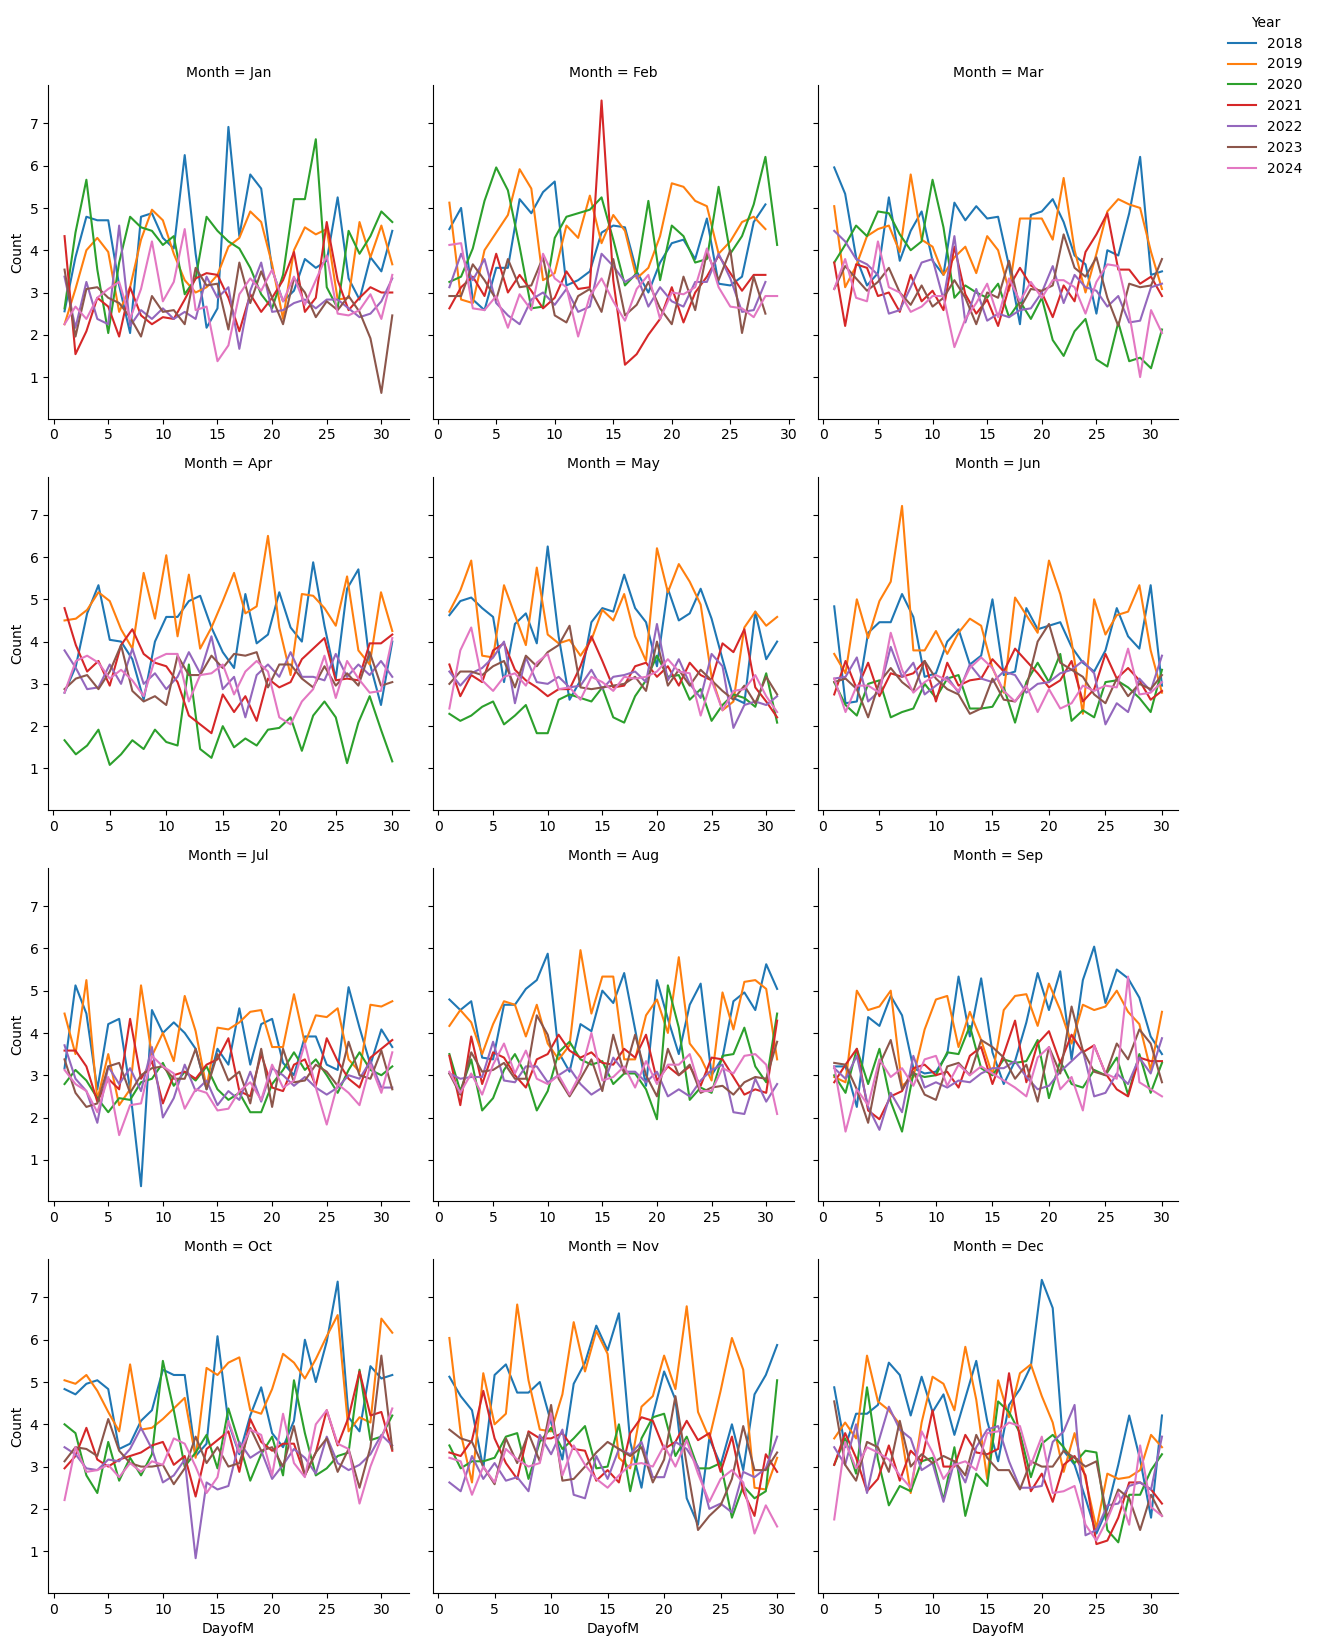

In [37]:
month_list = ['January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December']
mon_order = [month[0:3] for month in month_list]

g = sns.FacetGrid(data = hrly_df, col = 'Month', col_wrap = 3, sharex = False, height = 4, aspect = 1, hue = 'Year', row_order = mon_order)
g.map(sns.lineplot, 'DayofM', 'Count', errorbar = None)
#for ax in g.axes.flat:
#    for label in ax.get_xticklabels():
#       label.set_rotation(45)
g.add_legend(loc = 'upper right', bbox_to_anchor = (1.03,1.03))
#plt.tight_layout()
plt.show()

In [38]:
#filtering out 2018-2020

hrly_df2 = hrly_df[hrly_df['Year']>2020]
hrly_df2['Year'].value_counts()

2024    8784
2021    8760
2022    8760
2023    8760
Name: Year, dtype: int64

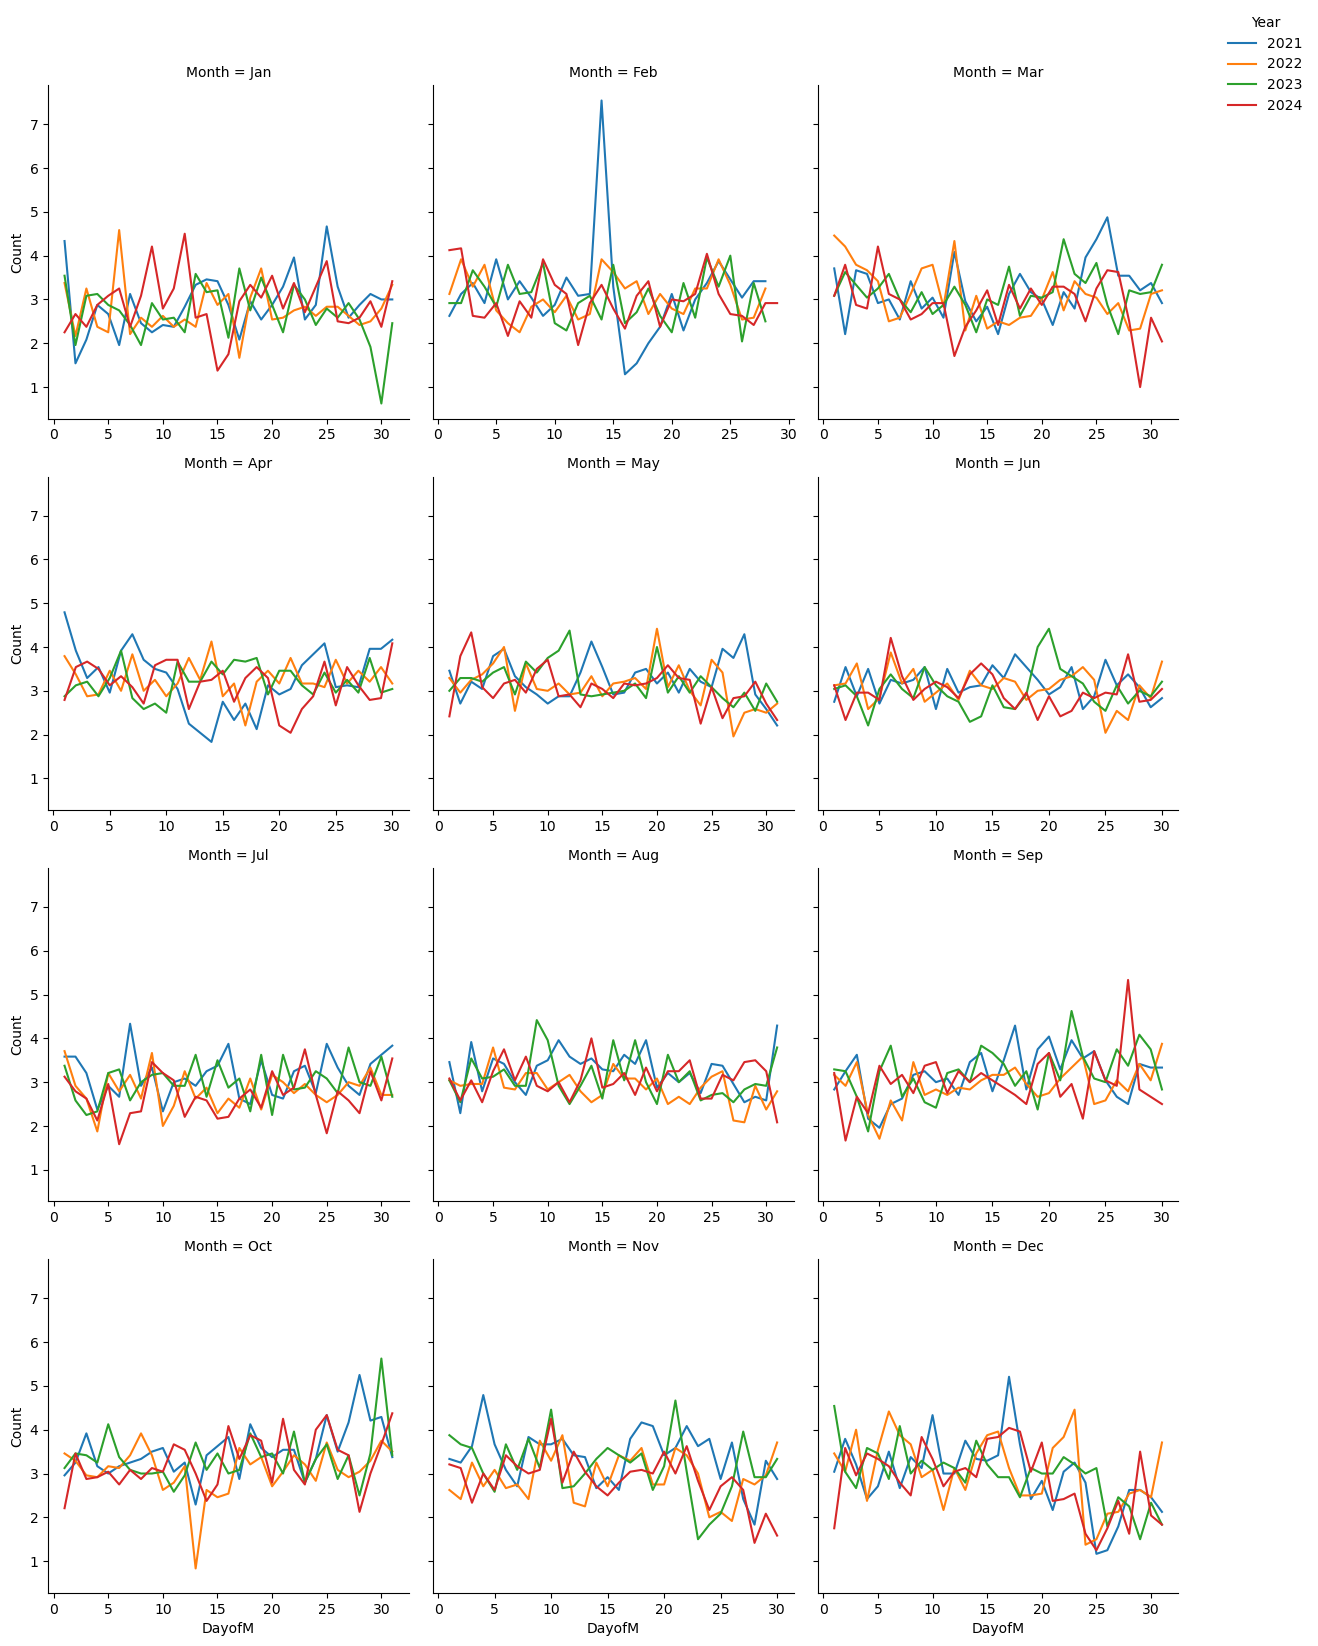

In [39]:
month_list = ['January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December']
mon_order = [month[0:3] for month in month_list]

g = sns.FacetGrid(data = hrly_df2, col = 'Month', col_wrap = 3, sharex = False, height = 4, aspect = 1, hue = 'Year', row_order = mon_order)
g.map(sns.lineplot, 'DayofM', 'Count', errorbar = None)
#for ax in g.axes.flat:
#    for label in ax.get_xticklabels():
#       label.set_rotation(45)
g.add_legend(loc = 'upper right', bbox_to_anchor = (1.03,1.03))
#plt.tight_layout()
plt.show()

#More to explore for date/time
Is there a week of the year that is more prone for accidents 

### Number of Motor Vehicles

In [40]:
df['Number of Motor Vehicles'].value_counts().sort_index()

0      24988
1      32307
2     142962
3      13458
4       2323
5        465
6        132
7         42
8         13
9          7
10         6
11         2
12         3
27         1
Name: Number of Motor Vehicles, dtype: Int64

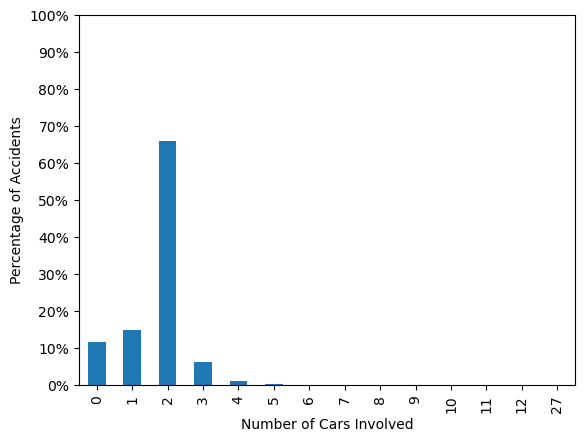

In [41]:
#df['Number of Motor Vehicles'].value_counts()

ax = df['Number of Motor Vehicles'].value_counts(normalize = True).sort_index().plot(kind = 'bar')
ytick = np.arange(0,1.1,0.1)
ylabel = ['{}%'.format(i) for i in np.arange(0,101,10)]
plt.yticks(ytick, ylabel)
plt.xlabel("Number of Cars Involved")
plt.ylabel("Percentage of Accidents")
plt.show()

In [42]:
#10% of car accidents with no motor vehicle involved
df[df['Number of Motor Vehicles']==0].groupby('Collision Type Description').size()

Collision Type Description
ANGLE                                      6619
Front to Rear                              7157
HEAD-ON                                     706
NOT COLLISION W/MOTOR VEHICLE-TRANSPORT    4769
OTHER                                       277
REAR-TO-REAR                                108
Rear to Side                                108
SIDESWIPE - OPPOSITE DIRECTION              514
SIDESWIPE - SAME DIRECTION                 3216
UNKNOWN                                     393
dtype: int64

In [43]:
df[(df['Number of Motor Vehicles']==0) & (df['Collision Type'] !=0)]['HarmfulDescriptions'].value_counts()

MOTOR VEHICLE IN TRANSPORT                                                                    16431
PARKED MOTOR VEHICLE                                                                            875
MOTOR VEHICLE IN TRANSPORT;PARKED MOTOR VEHICLE                                                 410
UNKNOWN MOST HARMFUL EVENT                                                                      172
Motor Vehicle-In-Motion Outside Trafficw                                                        118
                                                                                              ...  
MOTOR VEHICLE IN TRANSPORT;CONCRETE TRAFFIC BARRIER;Ran Off Road-Right;EMBANKMENT EARTH           1
MOTOR VEHICLE IN TRANSPORT;Other Traffic Barrier;FENCE;Ran Off Road-Right;Vehicle Airborne        1
MOTOR VEHICLE IN TRANSPORT;UTILITY POLE;CULVERT;FENCE;MAIL BOX                                    1
MOTOR VEHICLE IN TRANSPORT;DITCH;SHRUBBERY;Ran Off Road-Right                                     1


may have to delete rows where number of motor vehicles is 0 but Collision Type Description indicates the involvment of motor vehicles (eg. HEAD-ON, ANGLE, ETC)

#### Comparing Average Number of Cars involved over years

In [44]:
#Comparing Average Number of Cars involved over the years
df['Number of Motor Vehicles'].groupby(df['DateTime'].dt.year).mean()

DateTime
2018    1.954353
2019    1.963025
2020    1.911543
2021    1.748884
2022    0.292857
2023    1.933149
2024    1.925908
2025    1.917765
Name: Number of Motor Vehicles, dtype: Float64

In [45]:
#the average number of cars involved is close to 2 in all years except 2021 and 2022

In [46]:
#filtering for records before 2025, and where at least 1 MV is involved
df_mv = df2[df2['Number of Motor Vehicles'] > 0].copy()
df_mv

,Accident Number,DateTime,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Property Damage,Hit and Run,Collision Type Description,Weather Description,Illumination Description,...,ObjectId,Zip Code,RPA,Weather,IlluACCIDEmination,Collision Type,Reporting Officer,x,y,ct
0,2008473471,2018-07-14 23:00:00,2,2,0,N,N,ANGLE,NO ADVERSE CONDITIONS,NaN,...,1,37208,4525,1.0,1,4,225845,-9.664843e+06,4.323742e+06,1
1,20180039368,2018-01-12 23:34:00,1,0,0,N,Y,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,SNOW,DAYLIGHT,...,2,37207,18062,4.0,1,0,151132,-9.658798e+06,4.332935e+06,1
2,2008787228,2018-11-16 09:33:00,1,1,0,N,N,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,NO ADVERSE CONDITIONS,NaN,...,3,37203,5401,1.0,3,0,475881,-9.662645e+06,4.322558e+06,1
3,20180039370,2018-01-12 23:36:00,1,1,0,N,Y,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,SNOW,DARK - LIGHTED,...,4,37216,1431,4.0,3,0,240972,-9.655323e+06,4.328165e+06,1
4,2009131786,2019-02-19 22:42:00,1,1,0,N,N,HEAD-ON,NO ADVERSE CONDITIONS,NaN,...,5,37218,3235,1.0,1,2,562528,-9.674832e+06,4.329570e+06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211041,20250044785,2024-01-22 23:33:00,2,2,0,N,N,ANGLE,CLEAR,DARK - NOT LIGHTED,...,211042,37217,8873,21.0,2,4,4004229,-9.651723e+06,4.317190e+06,1
211330,20250053687,2024-10-15 03:51:00,2,0,0,N,Y,SIDESWIPE - SAME DIRECTION,CLEAR,DARK - LIGHTED,...,211331,37013,8713,21.0,3,5,4010267,-9.650159e+06,4.308043e+06,1
211390,20250028109,2024-01-15 03:10:00,2,0,0,N,N,Front to Rear,CLEAR,DARK - NOT LIGHTED,...,211391,37217,8937,21.0,2,11,4004229,-9.651628e+06,4.317100e+06,1
214047,20250199385,2024-03-30 06:00:00,1,0,0,N,N,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,RAIN,DARK - LIGHTED,...,214048,37205,5007,2.0,3,0,197055,-9.674833e+06,4.317729e+06,1


### Number of Injuries

In [47]:
df_mv['Number of Injuries'].value_counts(normalize = True)

0     0.715171
1     0.207241
2     0.054327
3     0.015124
4     0.004976
5     0.002025
6     0.000585
7     0.000298
8     0.000114
9     0.000065
10    0.000043
12    0.000027
11    0.000005
Name: Number of Injuries, dtype: Float64

72% of car accidents have no injuries involved<br>
20% result in 1 person injured, and 5% result in 2 people being injured<br>
Less than 3% of accidents result in 3 or more people being injured

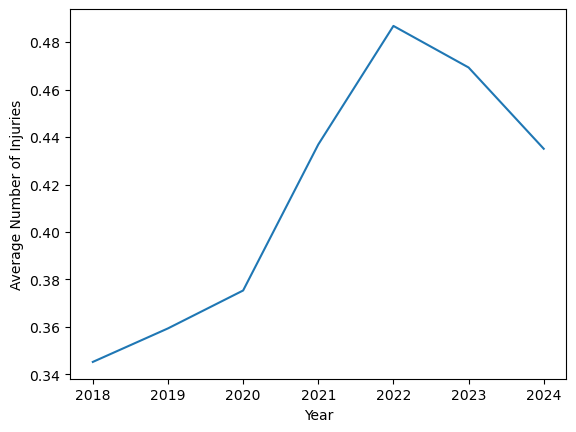

In [48]:
#Average Number of People Injured by Accident over time
df_mv['Number of Injuries'].groupby(df['DateTime'].dt.year).mean().plot(kind = 'line')
plt.xlabel('Year')
plt.ylabel ('Average Number of Injuries')
plt.show()

The average number of injuries by accident showed an increase every year until it peaked in 2022 at about 1 injury every 2 accidents, but has been decreasing since 2022

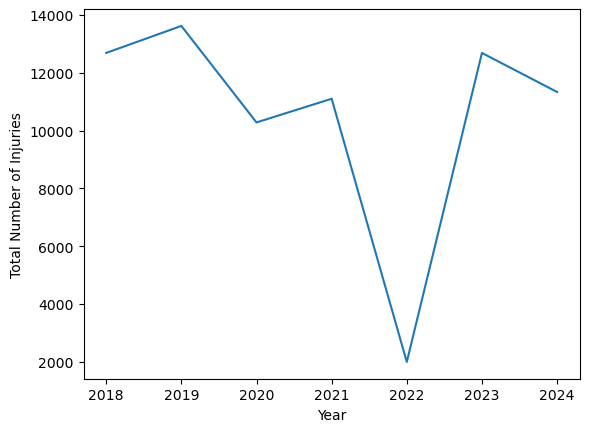

In [49]:
df_mv['Number of Injuries'].groupby(df['DateTime'].dt.year).sum().plot(kind = 'line')
plt.xlabel('Year')
plt.ylabel ('Total Number of Injuries')
plt.show()

<Axes: xlabel='DateTime', ylabel='Number of Injuries'>

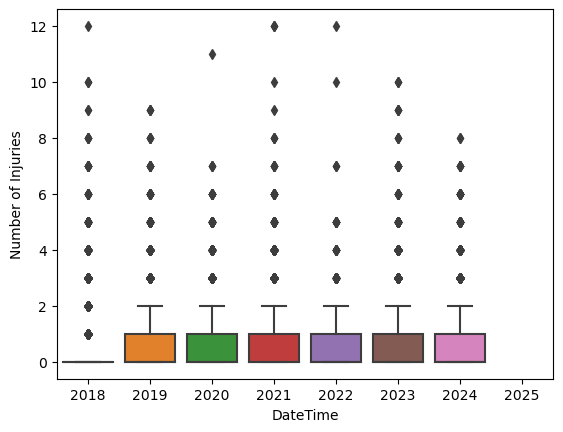

In [50]:
#Look at distribution of number of injuries by year
sns.boxplot(data = df_mv, x = df['DateTime'].dt.year, y = "Number of Injuries")

In [51]:
#adding year column to df_mv
df_mv['Year'] = df_mv['DateTime'].dt.year
df_mv['Year']

0         2018
1         2018
2         2018
3         2018
4         2019
          ... 
211041    2024
211330    2024
211390    2024
214047    2024
214607    2024
Name: Year, Length: 184679, dtype: int64

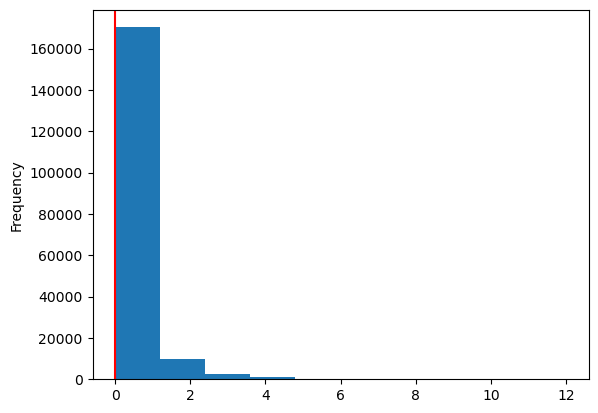

In [52]:
med = df_mv['Number of Injuries'].median()
ax = df_mv['Number of Injuries'].plot(kind = 'hist')
ax.axvline(med, color = 'red', label = med)

In [53]:
#define a plotting function
def custom_hist(data, col, **kwargs):
    sns.histplot(data, x = col, **kwargs)
    median = data[col].median()

In [54]:
def median_calc(data, col):
    median = data[col].median()
    print(median)
    
median_calc(df_mv, 'Number of Motor Vehicles')

2.0


In [55]:
def custom_hist(data, col, facet = None, **kwargs):
    sns.histplot(data, x = col, binwidth = 1, color = 'grey')
    med = data[col].median()
    avg = data[col].mean()
    plt.axvline(med, color = 'red', lw = 2, ls = '--', label = f'Median={med:.0f}')
    plt.axvline(avg, color = 'blue', lw = 2, ls = '-', label = f'Average={avg:.1f}')
    plt.legend()

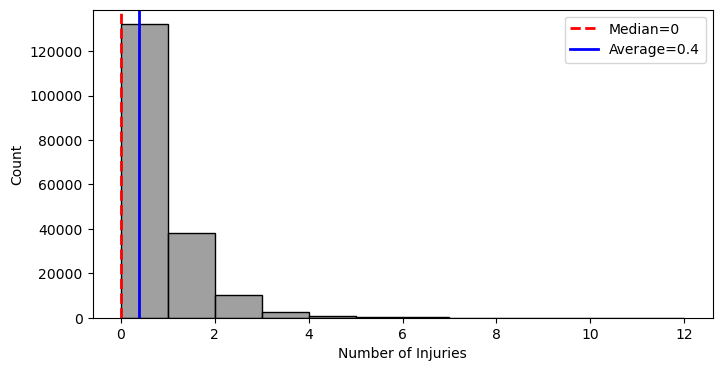

In [56]:
plt.figure(figsize = (8, 4))
custom_hist(data = df_mv, col = 'Number of Injuries')

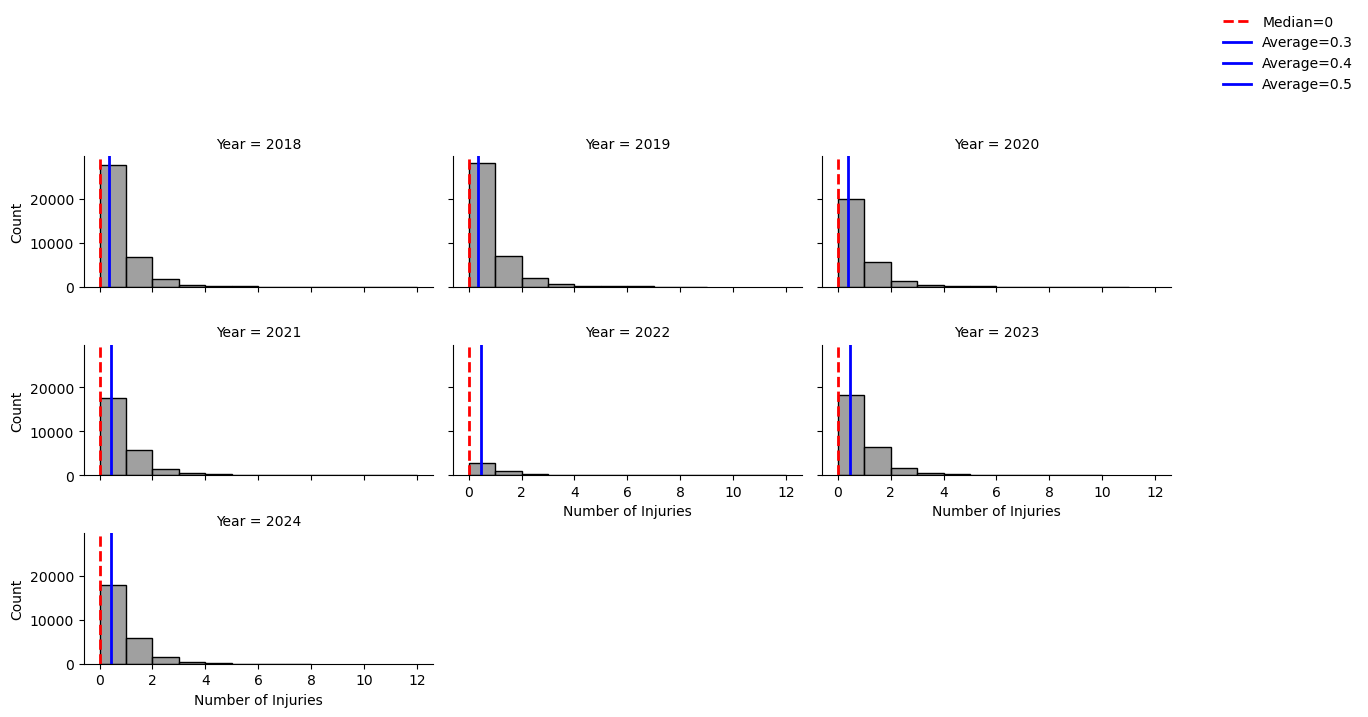

In [57]:
def custom_hist(data, **kwargs):
    
    sns.histplot(data, x = data['Number of Injuries'], binwidth = 1, color = 'grey')
    
    med = data['Number of Injuries'].median()
    plt.axvline(med, color = 'red', lw = 2, ls = '--', label = f'Median={med:.0f}')
    avg = data['Number of Injuries'].mean()
    plt.axvline(avg, color = 'blue', lw = 2, ls = '-', label = f'Average={avg:.1f}')
    #plt.legend()


#Define g: specify the df and what column to subset by
#Also facetgrid settings
g = sns.FacetGrid(data = df_mv, col = 'Year', col_wrap = 3, height = 2, aspect = 2)

#Apply the plot/df function to g
g.map_dataframe(custom_hist)
g.add_legend(loc = 'lower right', bbox_to_anchor = (1.03,1.03))
plt.show()

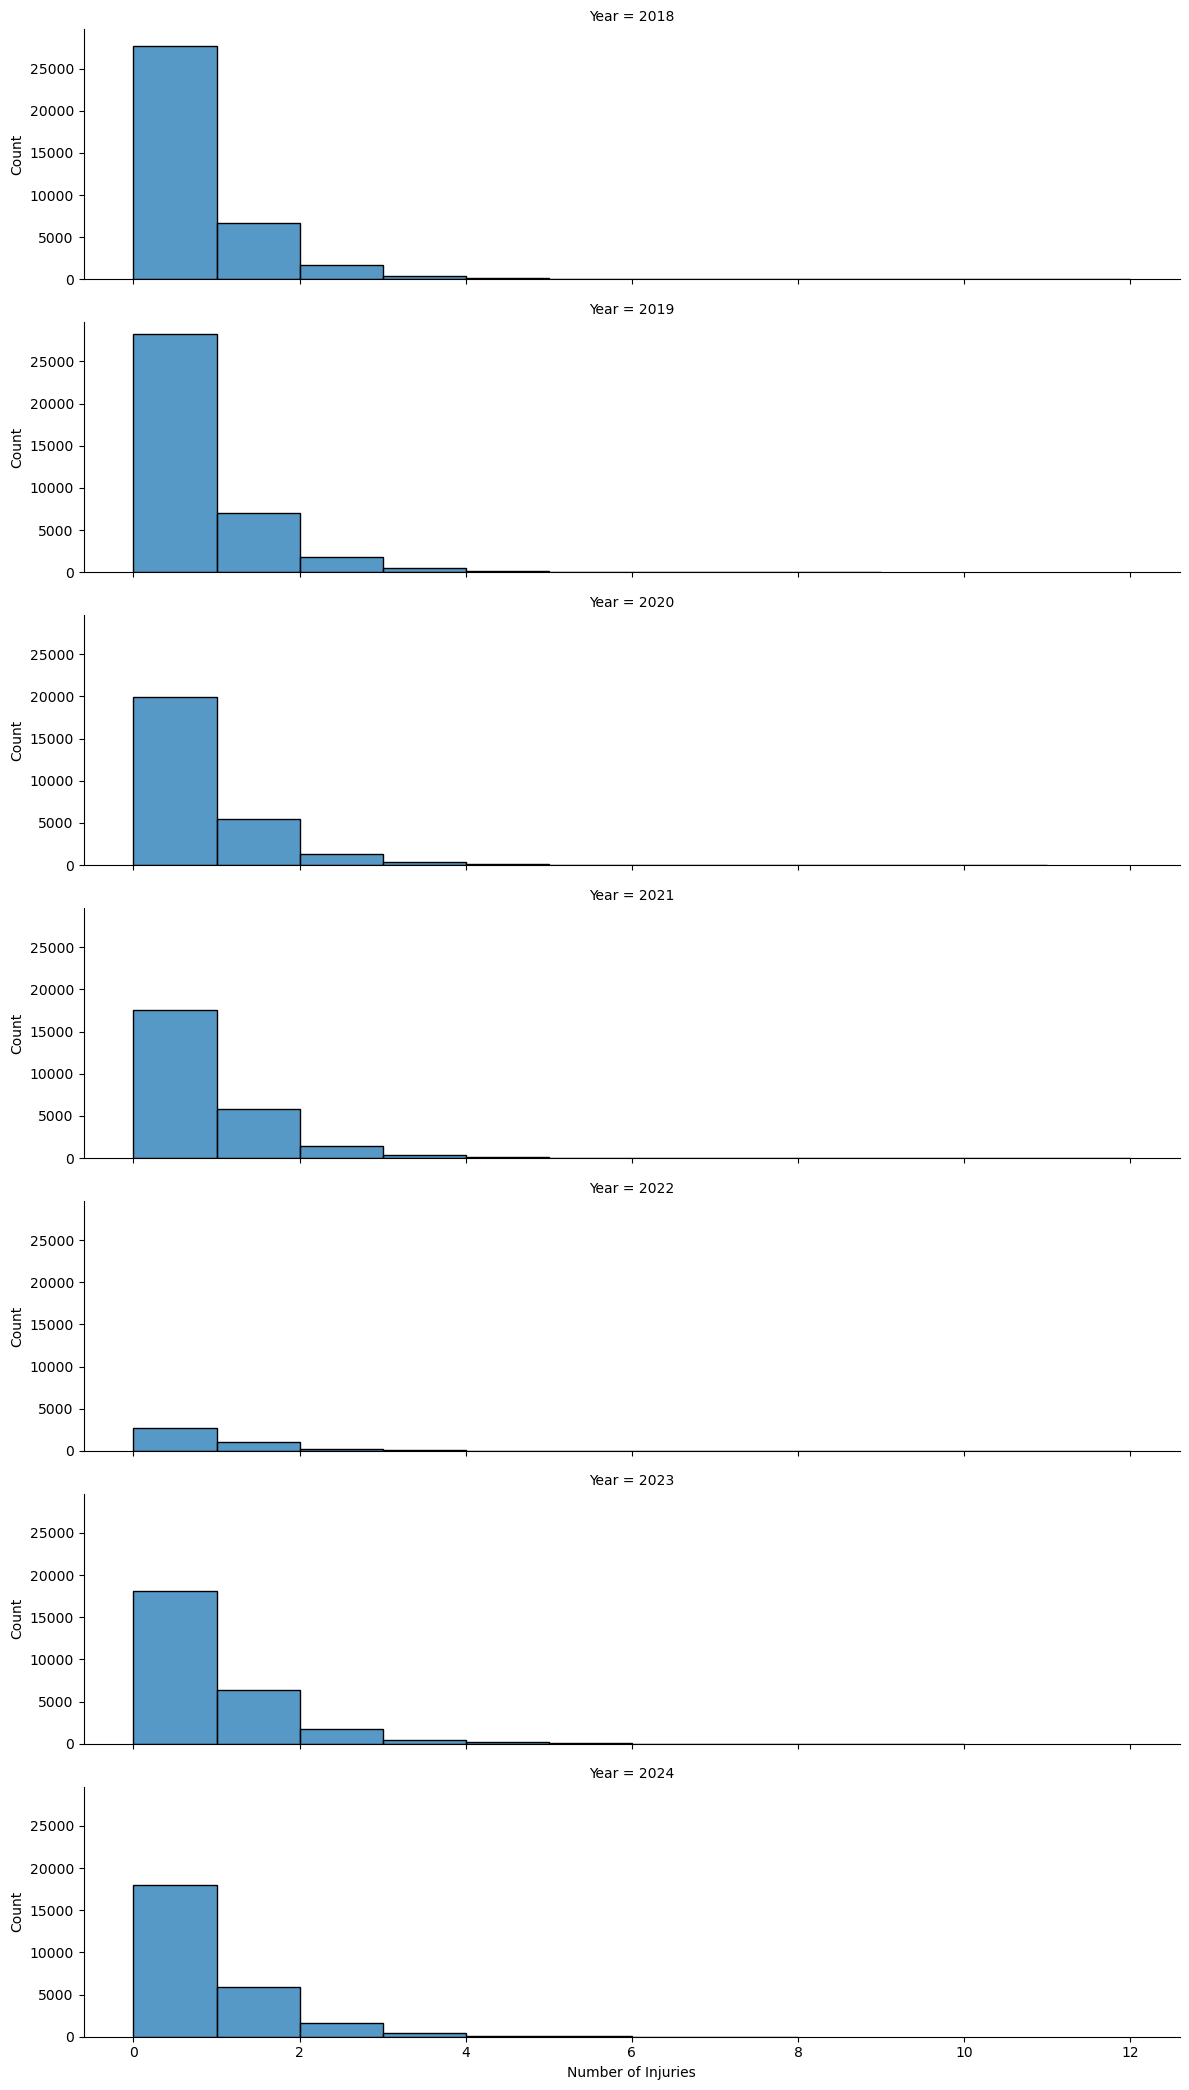

In [58]:
g = sns.FacetGrid(data = df_mv, col = 'Year', col_wrap = 1, sharex = True, height = 3, aspect = 4)
g.map(sns.histplot, 'Number of Injuries', binwidth = 1)
plt.show()

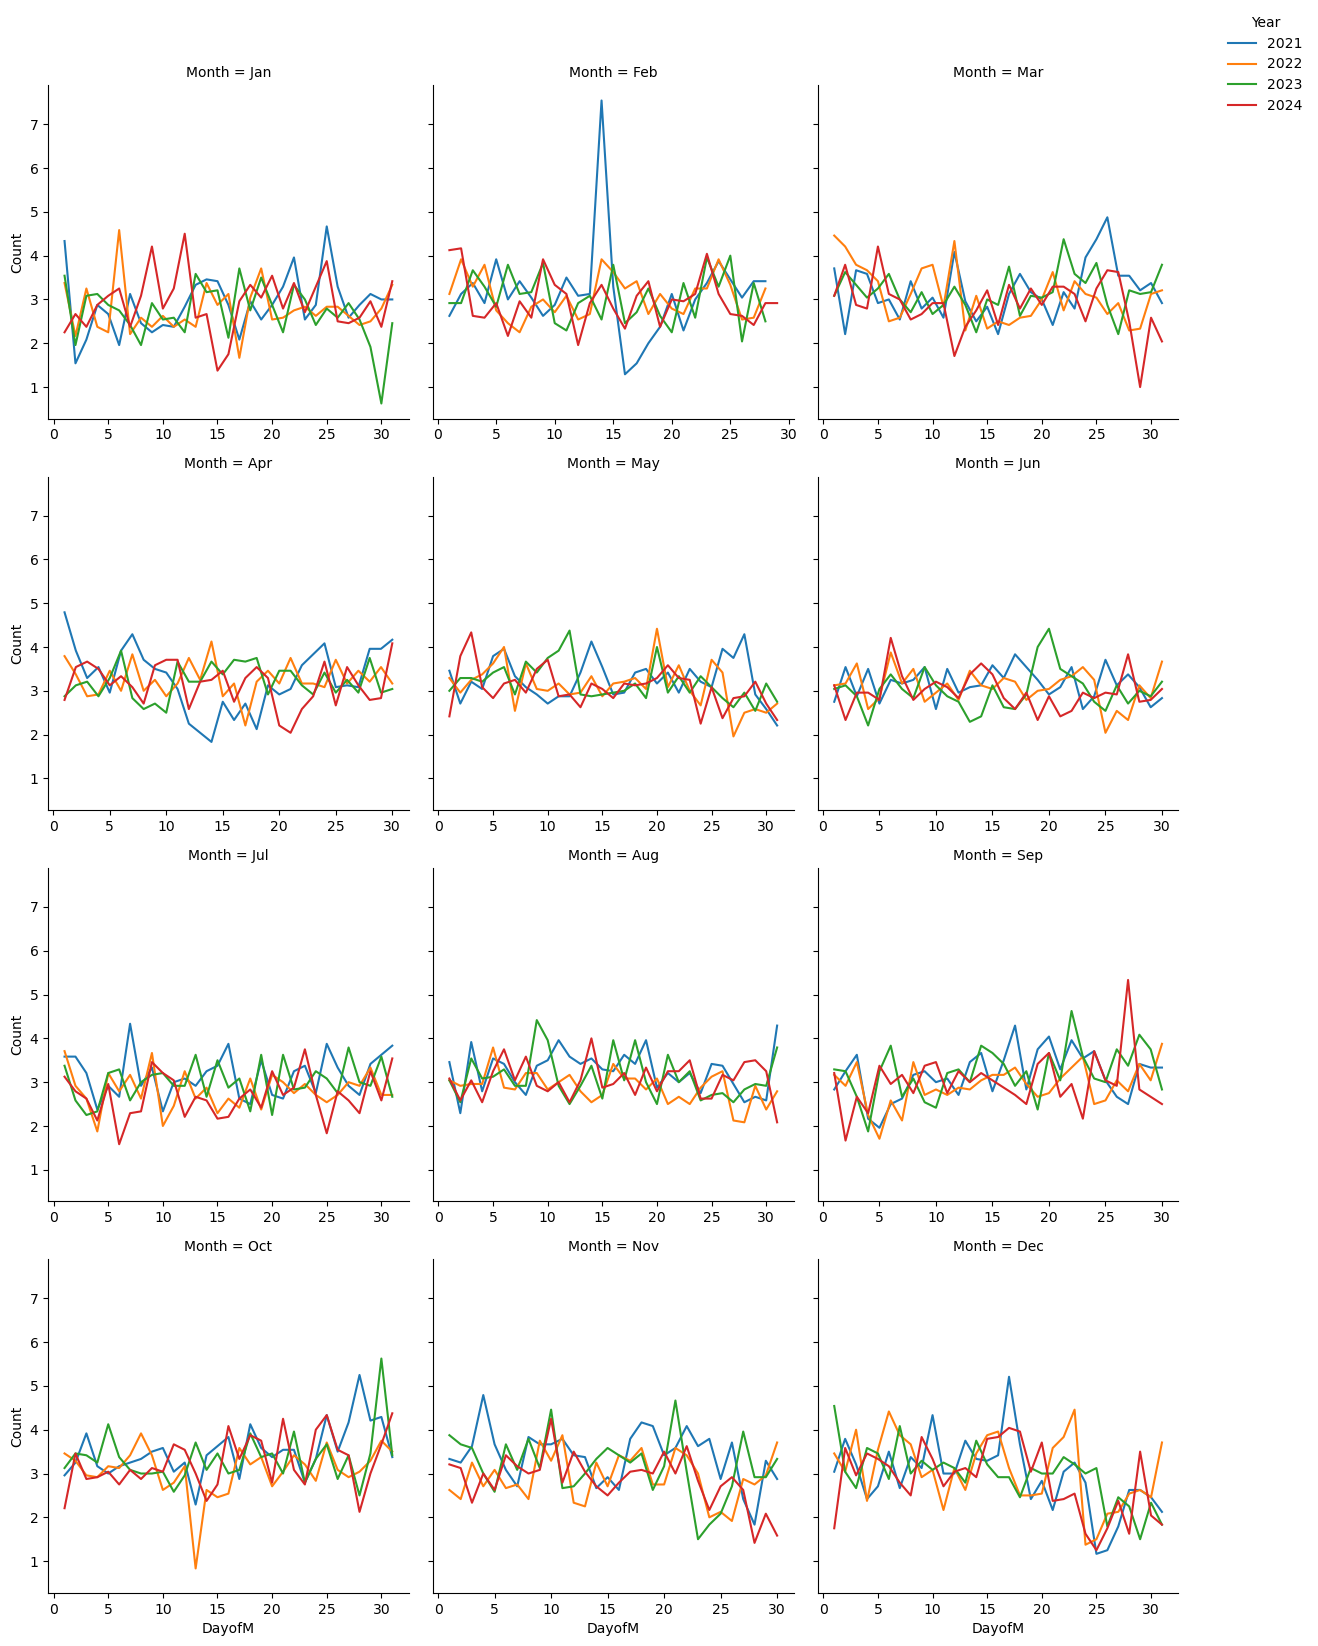

In [59]:
g = sns.FacetGrid(data = hrly_df2, col = 'Month', col_wrap = 3, sharex = False, height = 4, aspect = 1, hue = 'Year', row_order = mon_order)
g.map(sns.lineplot, 'DayofM', 'Count', errorbar = None)
#for ax in g.axes.flat:
#    for label in ax.get_xticklabels():
#       label.set_rotation(45)
g.add_legend(loc = 'upper right', bbox_to_anchor = (1.03,1.03))
#plt.tight_layout()
plt.show()

In [60]:
df_mv[df_mv['Number of Injuries']> 10]

,Accident Number,DateTime,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Property Damage,Hit and Run,Collision Type Description,Weather Description,Illumination Description,...,Zip Code,RPA,Weather,IlluACCIDEmination,Collision Type,Reporting Officer,x,y,ct,Year
17734,20180534914,2018-06-20 22:23:00,2,12,1,N,N,Front to Rear,CLEAR,DAYLIGHT,...,37210,8159,21.0,1,11,345098,-9.654889e+06,4.319696e+06,1,2018
83179,20200203580,2020-03-22 04:37:00,3,11,0,N,N,ANGLE,CLEAR,DARK - LIGHTED,...,37211,8715,21.0,3,4,320578,-9.653205e+06,4.308752e+06,1,2020
105223,20210088904,2021-02-13 13:50:00,27,12,0,N,N,OTHER,NaN,DAYLIGHT,...,37013,87040,NaN,1,98,799013,-9.643320e+06,4.303423e+06,1,2021
123008,20210516392,2021-10-02 17:42:00,3,12,0,N,N,Front to Rear,CLEAR,DAYLIGHT,...,37205,4903,21.0,1,11,902543,-9.660958e+06,4.321395e+06,1,2021
123379,20210517643,2021-10-03 16:15:00,3,12,0,N,N,Front to Rear,RAIN,DAYLIGHT,...,37189,2212,2.0,1,11,4002616,-9.665928e+06,4.343747e+06,1,2021
156370,20220662661,2022-12-31 13:45:00,3,12,0,N,N,HEAD-ON,CLOUDY,DAYLIGHT,...,37207,1809,22.0,1,2,109546,-9.657999e+06,4.332230e+06,1,2022


### Weather

<Axes: >

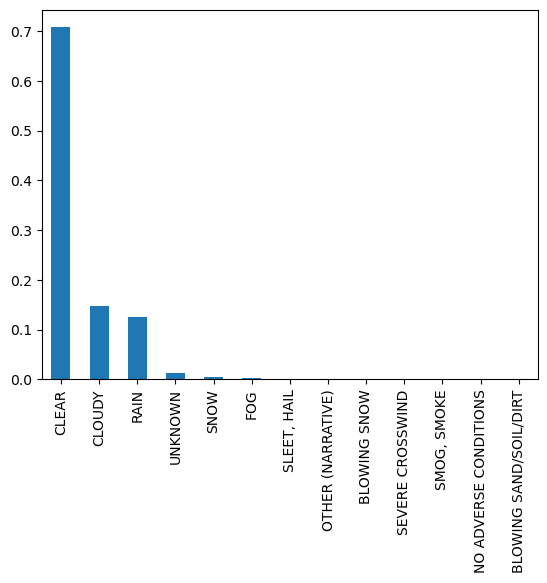

In [61]:
df_mv['Weather Description'].value_counts(normalize = True).plot(kind = 'bar')

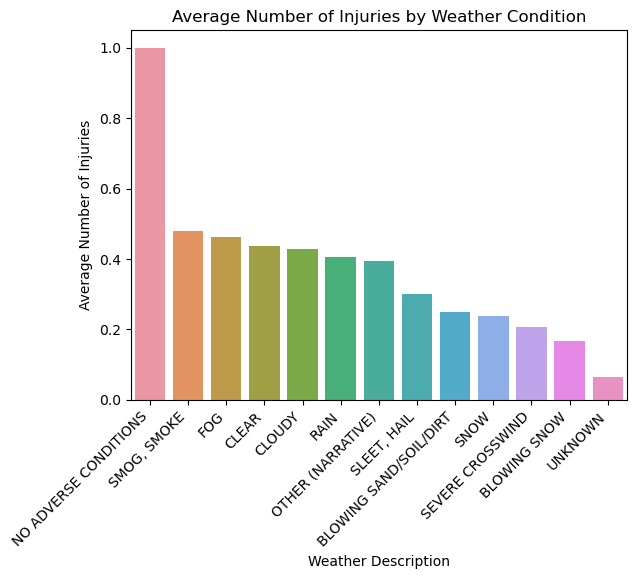

In [62]:

pt_order = df_mv['Number of Injuries'].groupby(df['Weather Description']).mean().sort_values(ascending = False).index.to_list()

ax = sns.barplot(data = df_mv, x = 'Weather Description', y = 'Number of Injuries', order = pt_order, errorbar = None)
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Average Number of Injuries')
plt.title('Average Number of Injuries by Weather Condition')
plt.show()

In [63]:
#weather and time interaction
#what kind of collision associated with most injuries, most fatalities

<Axes: >

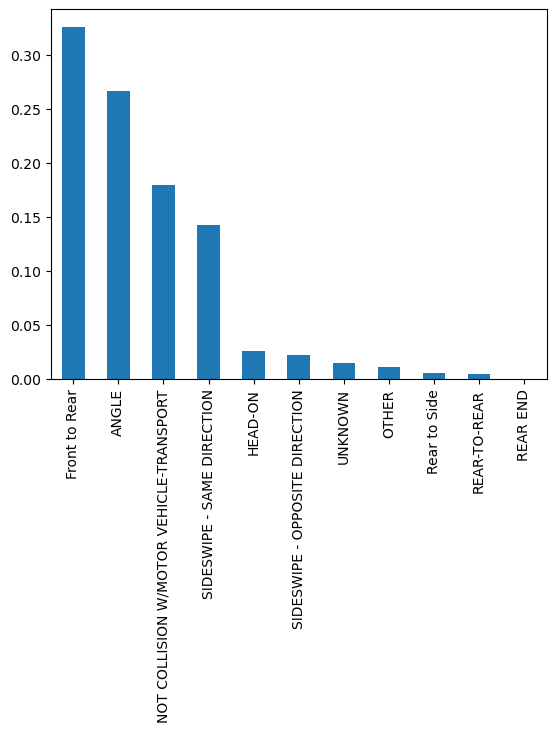

In [64]:
df['Collision Type Description'].value_counts(normalize = True).plot(kind = 'bar')

## Location Analysis

### Accidents by City

In [65]:
df['City'].value_counts()

NASHVILLE            160531
ANTIOCH               23691
MADISON               14705
HERMITAGE              7499
BRENTWOOD              2792
WHITES CREEK           2391
OLD HICKORY            2095
JOELTON                1466
GOODLETTSVILLE         1258
NOLENSVILLE             191
ASHLAND CITY             38
MOUNT JULIET             33
NOT IN CITY LIMIT         9
COOPERTOWN                3
OTHER                     2
FAIRVIEW                  1
BELLEVUE                  1
PEGRAM                    1
LAVERGNE                  1
SMYRNA                    1
Name: City, dtype: int64

In [66]:
df.to_csv('../data/df.csv', index = False)

In [67]:
df = pd.read_csv('../data/df.csv')
df

,Accident Number,DateTime,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Property Damage,Hit and Run,Collision Type Description,Weather Description,Illumination Description,...,ObjectId,Zip Code,RPA,Weather,IlluACCIDEmination,Collision Type,Reporting Officer,x,y,ct
0,2008473471,2018-07-14 23:00:00,2.0,2.0,0.0,N,N,ANGLE,NO ADVERSE CONDITIONS,NaN,...,1,37208.0,4525.0,1.0,1.0,4.0,225845.0,-9.664843e+06,4.323742e+06,1
1,20180039368,2018-01-12 23:34:00,1.0,0.0,0.0,N,Y,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,SNOW,DAYLIGHT,...,2,37207.0,18062.0,4.0,1.0,0.0,151132.0,-9.658798e+06,4.332935e+06,1
2,2008787228,2018-11-16 09:33:00,1.0,1.0,0.0,N,N,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,NO ADVERSE CONDITIONS,NaN,...,3,37203.0,5401.0,1.0,3.0,0.0,475881.0,-9.662645e+06,4.322558e+06,1
3,20180039370,2018-01-12 23:36:00,1.0,1.0,0.0,N,Y,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,SNOW,DARK - LIGHTED,...,4,37216.0,1431.0,4.0,3.0,0.0,240972.0,-9.655323e+06,4.328165e+06,1
4,2009131786,2019-02-19 22:42:00,1.0,1.0,0.0,N,N,HEAD-ON,NO ADVERSE CONDITIONS,NaN,...,5,37218.0,3235.0,1.0,1.0,2.0,562528.0,-9.674832e+06,4.329570e+06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216708,20250223880,2025-04-09 19:33:00,1.0,1.0,0.0,N,Y,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,CLEAR,DAYLIGHT,...,216709,37203.0,4077.0,21.0,1.0,0.0,352197.0,-9.660615e+06,4.322118e+06,1
216709,20250223892,2025-04-09 19:37:00,2.0,1.0,0.0,N,N,Front to Rear,CLEAR,DAYLIGHT,...,216710,37213.0,1107.0,21.0,1.0,11.0,571313.0,-9.659027e+06,4.324118e+06,1
216710,20250223903,2025-04-09 19:48:00,2.0,1.0,0.0,N,N,ANGLE,CLEAR,DAYLIGHT,...,216711,37217.0,8937.0,21.0,1.0,4.0,4017709.0,-9.645020e+06,4.312982e+06,1
216711,20250223956,2025-04-09 05:00:00,2.0,0.0,0.0,N,N,ANGLE,CLEAR,DAYLIGHT,...,216712,37203.0,5627.0,21.0,1.0,4.0,4001726.0,-9.664339e+06,4.320171e+06,1


### Accidents by Street

In [68]:
street = pd.DataFrame({'Street' : df['Street Address'].value_counts().index,
              'Count' : df['Street Address'].value_counts().values})
street

,Street,Count
0,I40 E EXT RAMP & I 40,876
1,I40 W EXT RAMP & I 40,848
2,I24 W EXT RAMP & I 24,773
3,I24 E EXT RAMP & I 24,722
4,MURFREESBORO PKE & MOUNTAIN SPRINGS RD,581
...,...,...
30398,BRILEY PKWYN & MCDONALD DR,1
30399,600 WOODS ST,1
30400,QUALYNN DR & VAILVIEW DR,1
30401,HADLEY AV & 9TH ST,1


In [69]:
street.head(10)

,Street,Count
0,I40 E EXT RAMP & I 40,876
1,I40 W EXT RAMP & I 40,848
2,I24 W EXT RAMP & I 24,773
3,I24 E EXT RAMP & I 24,722
4,MURFREESBORO PKE & MOUNTAIN SPRINGS RD,581
5,BRILEY PKWYN & BRILEY PKWYS,543
6,I40 E ENT RAMP & I 40,527
7,MM 86 5 I 65,515
8,I24 E ENT RAMP & I 24,499
9,MURFREESBORO PKE & BELL RD,473


30,403 unique addresses. Interstate addresses are at the top of the list where most accidents occured<br><br>

<Axes: ylabel='Frequency'>

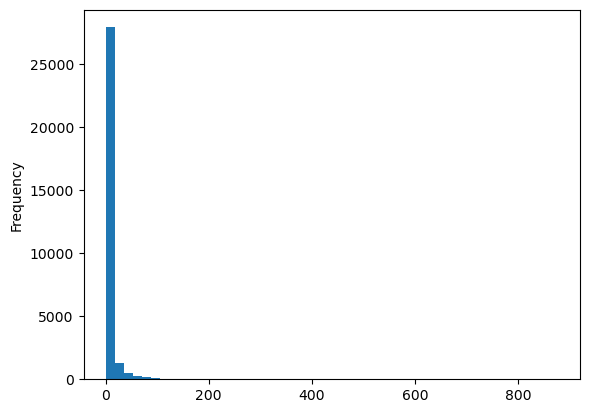

In [70]:
#Looking at distribution of counts of accidents per address
street['Count'].plot(kind = 'hist',bins = 50)

In [71]:
print('Median=', street['Count'].median() )
print('Mode=', street['Count'].mode().tolist())

Median= 2.0
Mode= [1]


The median number of accident for the addresses included is 2. <br>
1 accident is the mode or most common number of accidents per location.

In [72]:
#Looking at how many locations have had only 1 accident
mode = street['Count'].mode().tolist()

#filtering the Count column for the mode
[street[street['Count'] == i] for i in mode]

[                                         Street  Count
 16368               PLYMOUTH AVE & RIVERWOOD DR      1
 16369                             HOBBS & ESTES      1
 16370        RIVERCHASE BLVD & SPRING BRANCH DR      1
 16371                        WANDA DR & JADE DR      1
 16372                        36 WHITE BRIDGE RD      1
 ...                                         ...    ...
 30398                BRILEY PKWYN & MCDONALD DR      1
 30399                              600 WOODS ST      1
 30400                  QUALYNN DR & VAILVIEW DR      1
 30401                        HADLEY AV & 9TH ST      1
 30402  CAMBRIDGE AT HICKORY HOLW & THE OVERLOOK      1
 
 [14035 rows x 2 columns]]

In [73]:
14035/30403

0.4616320757819952

14,035 or 46% of locations have only had one accident.

In [74]:
np.percentile(street['Count'], np.arange(0, 101, 1))

array([  1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,
         1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,
         1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,
         1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,
         1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,
         1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   2.  ,
         2.  ,   2.  ,   2.  ,   2.  ,   2.  ,   2.  ,   2.  ,   2.  ,
         2.  ,   2.  ,   2.  ,   2.  ,   2.  ,   2.  ,   3.  ,   3.  ,
         3.  ,   3.  ,   3.  ,   3.  ,   3.  ,   3.  ,   4.  ,   4.  ,
         4.  ,   4.  ,   4.  ,   5.  ,   5.  ,   5.  ,   6.  ,   6.  ,
         6.  ,   7.  ,   7.  ,   8.  ,   9.  ,   9.  ,  10.  ,  11.  ,
        12.  ,  14.  ,  15.  ,  17.  ,  19.  ,  22.  ,  25.  ,  29.  ,
        36.  ,  44.  ,  59.  ,  87.98, 876.  ])

In [75]:
np.percentile(street['Count'], 95)

29.0

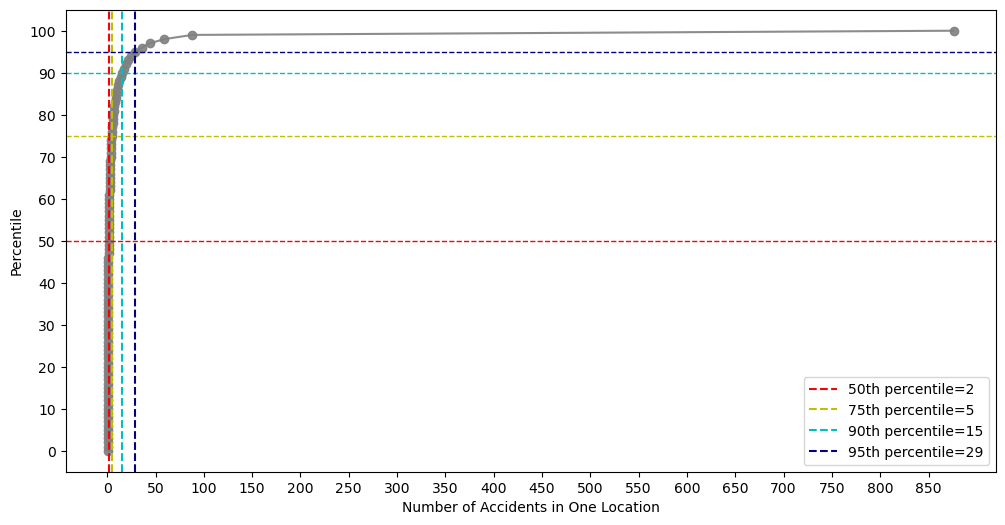

In [76]:
#plotting percentile graph for number of accidents by location
percentiles = np.arange(0, 101, 1)
values = np.percentile(street['Count'], percentiles)

#for interest points
median = street['Count'].median()
svntyf = np.percentile(street['Count'], 75)
ninety = np.percentile(street['Count'], 90)
ninf = np.percentile(street['Count'], 95)

plt.figure(figsize=(12,6))
plt.plot(values, percentiles,   marker = 'o', alpha = 0.9, color = 'gray')
plt.ylabel('Percentile')
plt.xlabel('Number of Accidents in One Location')
plt.xticks(np.arange(0, 900, 50))
plt.yticks(np.arange(0,101, 10))

plt.axvline(median, color = 'r',  ls = '--', label = f'50th percentile={median:.0f}')
plt.axhline(50,  ls = '--', color = 'r', lw = 1)

plt.axvline(svntyf, color = 'y', ls = '--', label = f'75th percentile={svntyf:.0f}')
plt.axhline(75, color = 'y', ls = '--', lw = 1)

plt.axvline(ninety, color = 'c', ls = '--', label = f'90th percentile={ninety:.0f}')
plt.axhline(90, color = 'c', ls = '--', lw = 1)

plt.axvline(ninf, color = 'navy', ls = '--', label = f'95th percentile={ninf:.0f}')
plt.axhline(95, color = 'navy', ls = '--', lw = 1)
plt.legend()
plt.show()

In [77]:
#taking closer look at an interstate address
df[df['Street Address'] == 'I40 E EXT RAMP & I 40'][['City', 'Lat', 'Long']].head()

,City,Lat,Long
189,NASHVILLE,36.16721,-86.60840
194,NASHVILLE,36.14351,-86.70005
223,NASHVILLE,36.14959,-86.77285
338,NASHVILLE,36.16955,-86.60654
574,NASHVILLE,36.15500,-86.62712


All the above are under 'I40 E EXT RAMP & I 40' address but have different locations.<br>
Interstate accidents do not have exact street addresses so they collectively have higher counts than other street adresses.
So only comparing either as interstate vs non-interstate or within the same group

In [78]:
#How many accidents occured on an interstate vs on a regular street?
intst = street[street['Street'].str.contains('I\d+', regex = True) 
               | 
               street['Street'].str.contains('I\s\d+', regex = True)
               | 
               street['Street'].str.contains('I-\d+', regex = True) 
               |  
               street['Street'].str.contains('INTERSTATE\s\d+', regex = True)
              ]
intst

,Street,Count
0,I40 E EXT RAMP & I 40,876
1,I40 W EXT RAMP & I 40,848
2,I24 W EXT RAMP & I 24,773
3,I24 E EXT RAMP & I 24,722
6,I40 E ENT RAMP & I 40,527
...,...,...
30337,I 40 & SPENCE LN,1
30362,53 I 440,1
30376,I65 S ENT RAMP & I440 W ENT RAMP,1
30391,I440 & IEXIT 5,1


In [79]:
intst.head(20)

,Street,Count
0,I40 E EXT RAMP & I 40,876
1,I40 W EXT RAMP & I 40,848
2,I24 W EXT RAMP & I 24,773
3,I24 E EXT RAMP & I 24,722
6,I40 E ENT RAMP & I 40,527
7,MM 86 5 I 65,515
8,I24 E ENT RAMP & I 24,499
12,I65 S EXT RAMP & I 65,449
14,I24 W ENT RAMP & I 24,392
15,I40 W ENT RAMP & I 40,365


In [80]:
intst['Count'].sum()

57344

In [81]:
street['Count'].sum()

216474

In [82]:
inst_ct = intst['Count'].sum()
tot_ct = street['Count'].sum()
inst_pct = inst_ct/tot_ct

print(f'{inst_ct:,}','or', f'{inst_pct:.0%}', 'of all accidents occured on an interstate or an enterance/exit of an interstate.')

57,344 or 26% of all accidents occured on an interstate or an enterance/exit of an interstate.


57,344 accidents or 27% of accidents occured on an interstate or an enterance/exit of an interstate.<br>
I-40 East and I-40 West have the top counts of accidents

In [83]:
#filtering non-interstate locations

notint = street[~(street['Street'].str.contains('I\d+', regex = True) 
                  | street['Street'].str.contains('I\s\d+', regex = True) 
                  | street['Street'].str.contains('I-\d+', regex = True) 
                  | street['Street'].str.contains('INTERSTATE\s\d+', regex = True))]
notint

,Street,Count
4,MURFREESBORO PKE & MOUNTAIN SPRINGS RD,581
5,BRILEY PKWYN & BRILEY PKWYS,543
9,MURFREESBORO PKE & BELL RD,473
10,UNKNOWN RAMP & ROAD,454
11,BELL RD & CANE RIDGE RD,449
...,...,...
30398,BRILEY PKWYN & MCDONALD DR,1
30399,600 WOODS ST,1
30400,QUALYNN DR & VAILVIEW DR,1
30401,HADLEY AV & 9TH ST,1


In [84]:
#Top 20 Non-interstate locations
notint.head(20)

,Street,Count
4,MURFREESBORO PKE & MOUNTAIN SPRINGS RD,581
5,BRILEY PKWYN & BRILEY PKWYS,543
9,MURFREESBORO PKE & BELL RD,473
10,UNKNOWN RAMP & ROAD,454
11,BELL RD & CANE RIDGE RD,449
13,BRILEY PKWYS & BRILEY PKWYN,421
16,BRILEY PKWYW & BRILEY PKWYE,336
17,NOLENSVILLE PKE & HARDING PL,314
20,MURFREESBORO PKE & HOBSON PKE,302
21,LEBANON PKE & ANDREW JACKSON PKWY,298


In [85]:
#labeling original data based on interstate/regular road

In [86]:
non_ints_s = notint['Street'].to_list()
ints_s = intst['Street'].to_list()

def row_function(row):
    if row['Street Address'] in ints_s:
        return "Y"
    elif row['Street Address'] in non_ints_s:
        return "N"

In [87]:
df['Interstate'] = df.apply(row_function, axis = 1)

In [88]:
df['Interstate']

0         N
1         Y
2         N
3         N
4         N
         ..
216708    N
216709    N
216710    N
216711    N
216712    Y
Name: Interstate, Length: 216713, dtype: object

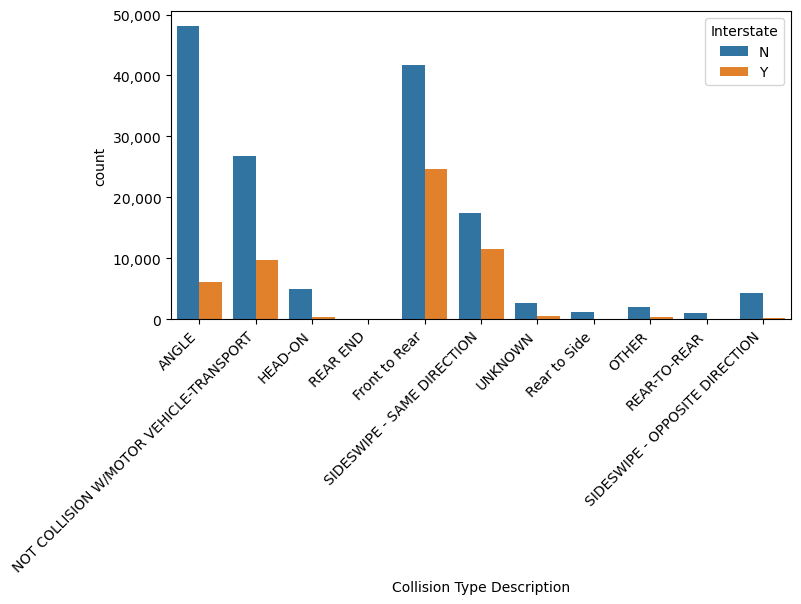

In [89]:
plt.figure(figsize = (8, 4))
sns.countplot(data = df, x = "Collision Type Description", hue= "Interstate")
plt.xticks(rotation = 45, ha = 'right')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.show()

Off the interstate, Angle Collision type is most common, followed by Front to Rear. On the interstate, Front to Rear is the most common type of collision followed by Sideswipe in the same direction

In [90]:
#Looking at time of day and interstate vs non-interstate
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['DateTime'].dtype

dtype('<M8[ns]')

In [91]:
df['Hour'] = df['DateTime'].dt.strftime('%#I %p')
df['HR'] = df['DateTime'].dt.hour

In [92]:
df[['DateTime', 'Hour', 'HR', 'ct']].head()

,DateTime,Hour,HR,ct
0,2018-07-14 23:00:00,11 PM,23,1
1,2018-01-12 23:34:00,11 PM,23,1
2,2018-11-16 09:33:00,9 AM,9,1
3,2018-01-12 23:36:00,11 PM,23,1
4,2019-02-19 22:42:00,10 PM,22,1


Text(0, 0.5, 'Average # of Accidents')

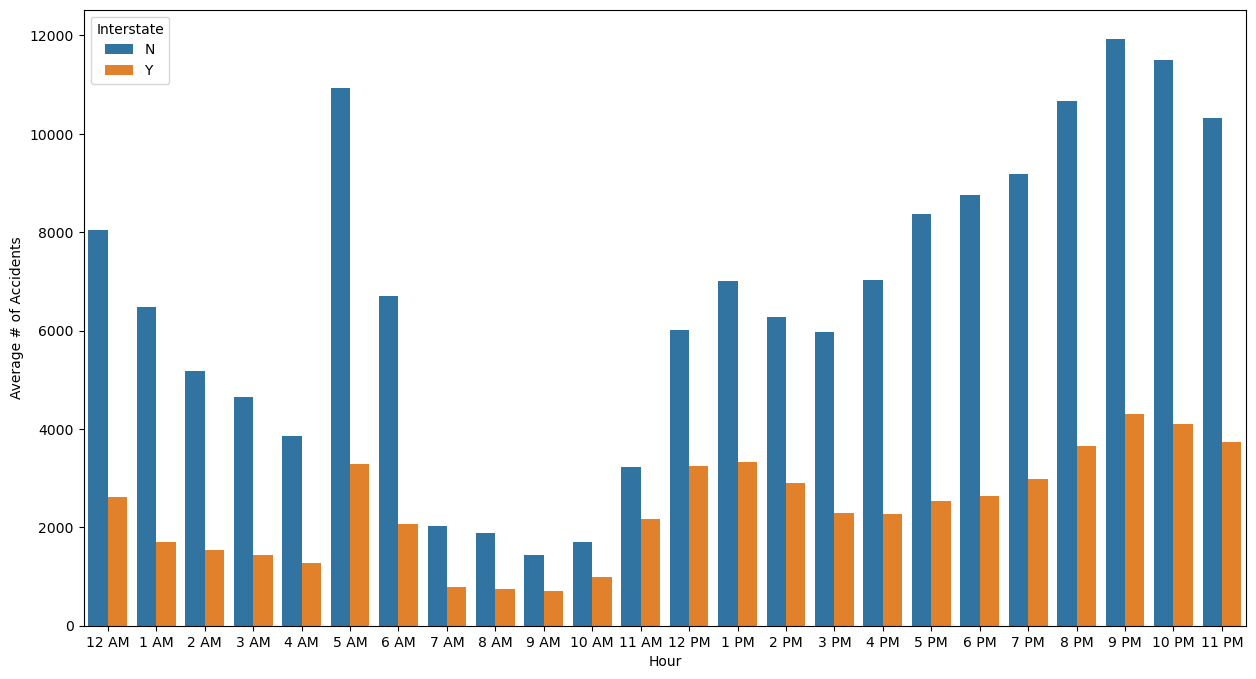

In [93]:
plt.figure(figsize = (15,8))
sns.barplot(data = df.sort_values(by = 'HR'),  x = 'Hour', y = 'ct', hue = 'Interstate', estimator = np.sum)
plt.ylabel('Average # of Accidents')

In [94]:
hr_it = pd.DataFrame(df.sort_values('HR').groupby(['Hour'], sort = False)['Interstate'].value_counts())
#hr_it.columns = ['Hour', 'Interstate', 'Count']
hr_it.columns = ['Count']
hr_it = hr_it.reset_index()
hr_it

,Hour,Interstate,Count
0,12 AM,N,8043
1,12 AM,Y,2619
2,1 AM,N,6471
3,1 AM,Y,1705
4,2 AM,N,5182
5,2 AM,Y,1544
6,3 AM,N,4650
7,3 AM,Y,1435
8,4 AM,N,3865
9,4 AM,Y,1276


In [95]:
hr_itp = pd.DataFrame(df.sort_values('HR').groupby(['Hour'], sort = False)['Interstate'].value_counts(normalize = True))
hr_itp.columns = ['pct']
hr_itp = hr_itp.reset_index()
hr_itp

,Hour,Interstate,pct
0,12 AM,N,0.754361
1,12 AM,Y,0.245639
2,1 AM,N,0.791463
3,1 AM,Y,0.208537
4,2 AM,N,0.770443
5,2 AM,Y,0.229557
6,3 AM,N,0.764174
7,3 AM,Y,0.235826
8,4 AM,N,0.751799
9,4 AM,Y,0.248201


In [96]:
hr_it[['Hour', 'Interstate']] == hr_itp[['Hour', 'Interstate']]

,Hour,Interstate
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
5,True,True
6,True,True
7,True,True
8,True,True
9,True,True


In [97]:
hr_itp = hr_itp.join(hr_it, lsuffix= '_l')
hr_itp = hr_itp.drop(columns = ['Hour_l', 'Interstate_l'])
hr_itp = hr_itp[['Hour', 'Interstate', 'Count', 'pct']]
hr_itp

,Hour,Interstate,Count,pct
0,12 AM,N,8043,0.754361
1,12 AM,Y,2619,0.245639
2,1 AM,N,6471,0.791463
3,1 AM,Y,1705,0.208537
4,2 AM,N,5182,0.770443
5,2 AM,Y,1544,0.229557
6,3 AM,N,4650,0.764174
7,3 AM,Y,1435,0.235826
8,4 AM,N,3865,0.751799
9,4 AM,Y,1276,0.248201


In [98]:
hr_itpv = hr_itp.sort_index(ascending = False).pivot_table(index = 'Hour', columns = 'Interstate', values = 'pct', sort = False)
#hr_itpv = hr_itpv.reset_index()
hr_itpv

Interstate,Y,N
Hour,,
11 PM,0.266174,0.733826
10 PM,0.262655,0.737345
9 PM,0.265324,0.734676
8 PM,0.255337,0.744663
7 PM,0.245004,0.754996
6 PM,0.231983,0.768017
5 PM,0.231771,0.768229
4 PM,0.244523,0.755477
3 PM,0.277462,0.722538


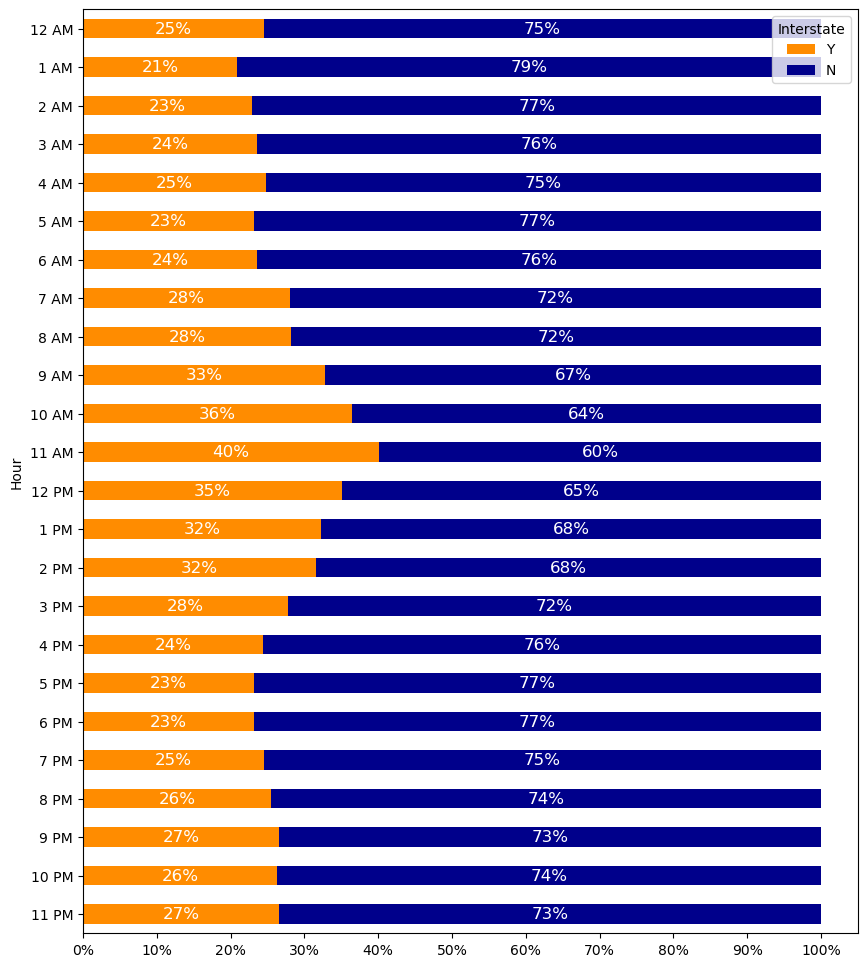

In [99]:
colors= [ 'darkorange', 'darkblue']
ax = hr_itpv.plot(kind = 'barh', stacked = True, ylabel = 'Hour', color=colors,  figsize=(10,12))
xt = np.arange(0, 1.1, 0.1)
xl = ['{}%'.format(i) for i in np.arange(0,101,10)]
plt.xticks(xt, xl)

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The width of the bar is the data value and can be used as the label
    label_text = f'{width:.0%}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12, color = 'w')


plt.show()

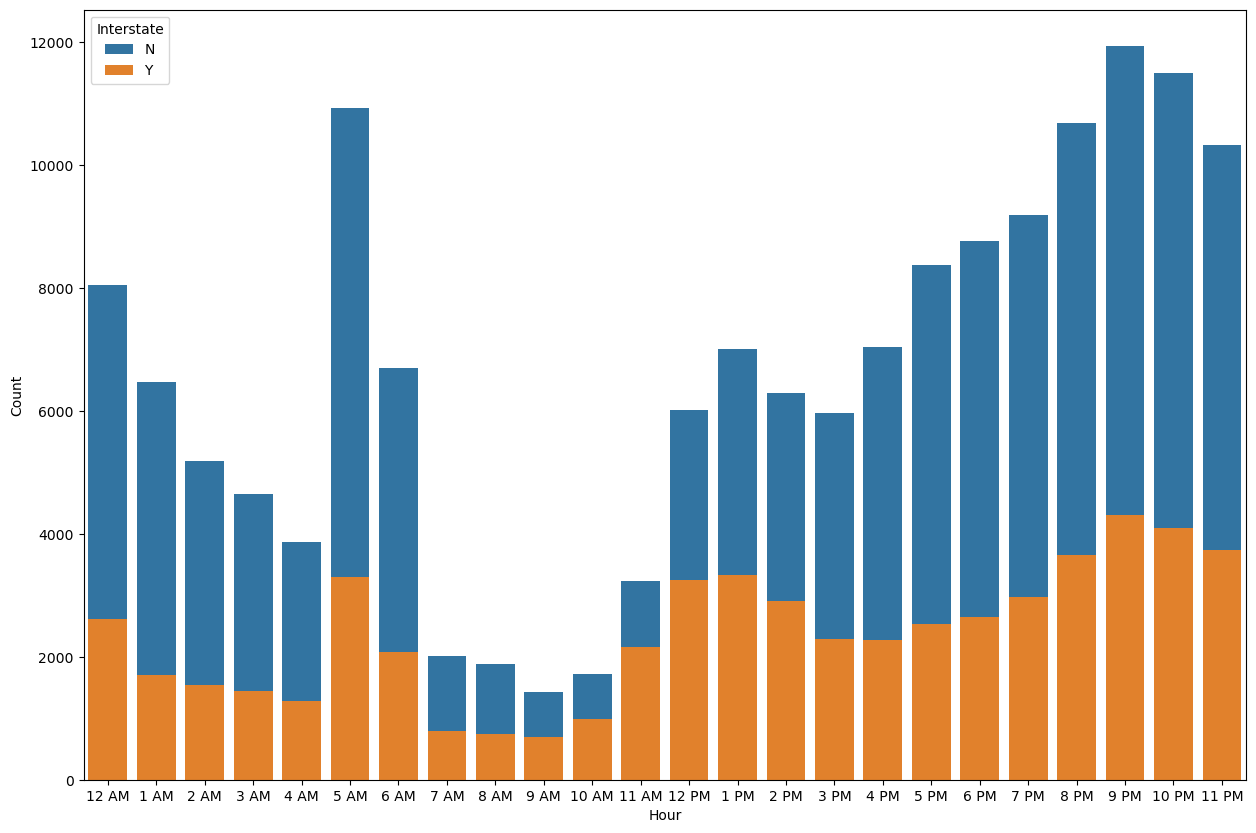

In [100]:
plt.figure(figsize= (15,10))
sns.barplot(data = hr_it, x = 'Hour', y = 'Count', hue = 'Interstate', dodge = False)
plt.show()